# Colormap Value Prediction

It is not the rare case to encounter colormaps created with certain values. Sometimes values of these colormaps can be required.

This program is about finding the values which a colormap took as input. Workflow is as follows:

    - Arranging images by cropping the map and legend seperately.
    
    - At least one dimension of them must be same.
    
    - Values in legend is arranged manually since min and max values are stated and amount of pixels in columns are known, column pixels will be the number of elements in the legend value dataset.
    
    - ML is used to learn relationship of pixel values (RGB) with value given for legend.
    
    - Using that relationship, prediction is done to find value of the colormap from its pixels.

In [49]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [50]:
test_img = plt.imread(r"C:\Users\Yiğit\Desktop\colormap_example_cropped.png")
legend_img = plt.imread(r"C:\Users\Yiğit\Desktop\img_legend.png")

(163, 194, 3)


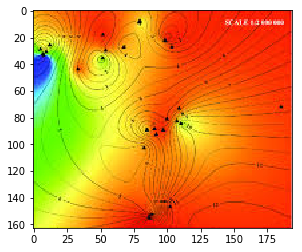

In [51]:
%matplotlib inline
plt.imshow(test_img)
print(test_img.shape)

(163, 9, 3)


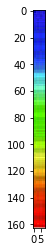

In [52]:
plt.imshow(legend_img)
print(legend_img.shape)

In [53]:
import numpy as np
legend_results = np.linspace(50.5, 43.5, num=163)
legend_results

array([50.5       , 50.45679012, 50.41358025, 50.37037037, 50.32716049,
       50.28395062, 50.24074074, 50.19753086, 50.15432099, 50.11111111,
       50.06790123, 50.02469136, 49.98148148, 49.9382716 , 49.89506173,
       49.85185185, 49.80864198, 49.7654321 , 49.72222222, 49.67901235,
       49.63580247, 49.59259259, 49.54938272, 49.50617284, 49.46296296,
       49.41975309, 49.37654321, 49.33333333, 49.29012346, 49.24691358,
       49.2037037 , 49.16049383, 49.11728395, 49.07407407, 49.0308642 ,
       48.98765432, 48.94444444, 48.90123457, 48.85802469, 48.81481481,
       48.77160494, 48.72839506, 48.68518519, 48.64197531, 48.59876543,
       48.55555556, 48.51234568, 48.4691358 , 48.42592593, 48.38271605,
       48.33950617, 48.2962963 , 48.25308642, 48.20987654, 48.16666667,
       48.12345679, 48.08024691, 48.03703704, 47.99382716, 47.95061728,
       47.90740741, 47.86419753, 47.82098765, 47.77777778, 47.7345679 ,
       47.69135802, 47.64814815, 47.60493827, 47.5617284 , 47.51

In [54]:
legend_results.shape

(163,)

In [55]:
legend_img

array([[[0.05882353, 0.04705882, 0.69411767],
        [0.        , 0.00784314, 0.6       ],
        [0.0627451 , 0.02745098, 0.7607843 ],
        ...,
        [0.08627451, 0.04705882, 0.8117647 ],
        [0.10588235, 0.07058824, 0.8039216 ],
        [0.03921569, 0.        , 0.8156863 ]],

       [[0.09019608, 0.07058824, 0.78039217],
        [0.03137255, 0.03529412, 0.7019608 ],
        [0.17254902, 0.14117648, 0.85490197],
        ...,
        [0.16470589, 0.12941177, 0.8784314 ],
        [0.13333334, 0.10196079, 0.8156863 ],
        [0.05490196, 0.00784314, 0.8156863 ]],

       [[0.1764706 , 0.14901961, 0.9098039 ],
        [0.15294118, 0.14509805, 0.8784314 ],
        [0.2       , 0.16078432, 0.91764706],
        ...,
        [0.1764706 , 0.13333334, 0.92156863],
        [0.13333334, 0.09411765, 0.8509804 ],
        [0.05490196, 0.        , 0.8509804 ]],

       ...,

       [[0.9882353 , 0.        , 0.01176471],
        [0.972549  , 0.        , 0.        ],
        [0.9607843 , 0

Slice into image:

In [56]:
import scipy.misc as smp
from PIL import Image

#legend_slice = smp.toimage(legend_img[:,0,:])       # Create a PIL image
#legend_slice.show()   

In [57]:
X_train = legend_img
y_train = np.linspace(50.5, 43.5, num=X_train.shape[0])

X_test = test_img
#y_test #user will manually asses the result with by comparing visuals

## Machine Learning

In order to make images compatible either:

    - Legend must be expanded into level of actual map or Slice of map must be taken
    
    - Data must be divided as a pandas DataFrame

## Choosing One Slice of Legend Image

Choosing only one column will make the data 2d.

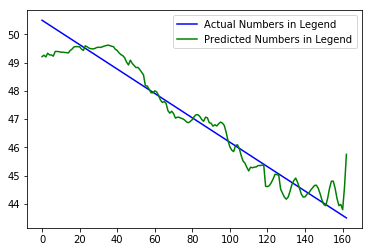

rmse of slice index 0 : 0.49278732263179303


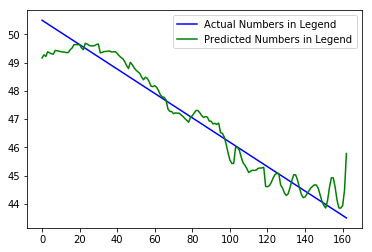

rmse of slice index 1 : 0.48238036110503907


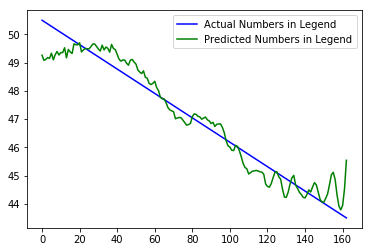

rmse of slice index 2 : 0.5120359777268093


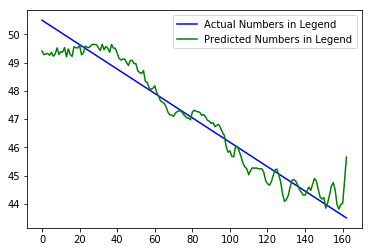

rmse of slice index 3 : 0.48721569814814786


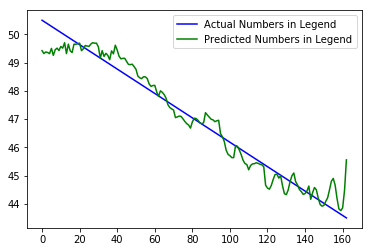

rmse of slice index 4 : 0.44938435358409934


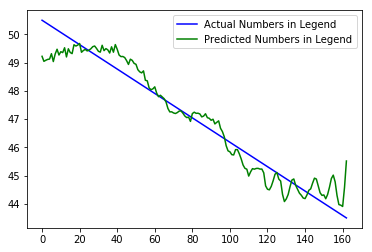

rmse of slice index 5 : 0.5228074086952431


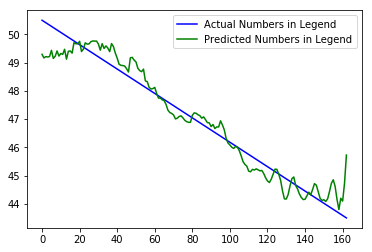

rmse of slice index 6 : 0.4960046278081101


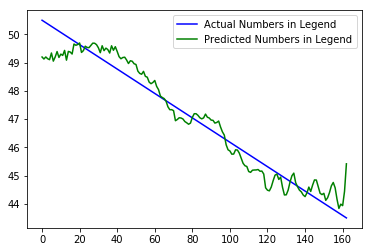

rmse of slice index 7 : 0.5095123872374329


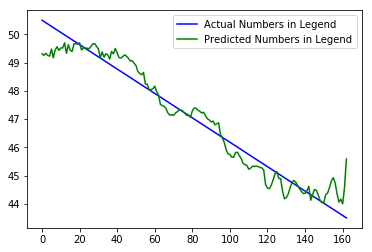

rmse of slice index 8 : 0.47895166180605764


In [63]:
lr_rmse = {}

for i in range(0,9):
    
    model = LinearRegression()

    model.fit(X_train[:,i,:], y_train)
    
    plt.plot(y_train, "b", label='Actual Numbers in Legend')

    y_test = model.predict(X_train[:,i,:])

    plt.plot(y_test, "g", label="Predicted Numbers in Legend")

    plt.legend()

    plt.show()
    
    print("rmse of slice index", i, ":", sqrt(mean_squared_error(y_train, y_test)))
    
    lr_rmse[i] = sqrt(mean_squared_error(y_train, y_test))

In [69]:
print(lr_rmse)
print("---")
print("best result is with the slice index of:")
print(min(lr_rmse, key=lr_rmse.get))

{0: 0.49278732263179303, 1: 0.49278732263179303, 2: 0.49278732263179303, 3: 0.49278732263179303, 4: 0.49278732263179303, 5: 0.49278732263179303, 6: 0.49278732263179303, 7: 0.49278732263179303, 8: 0.49278732263179303}
---
best result is with the slice index of:
0


## Row-wise Regression

In [82]:
for i in range(0,X_train.shape[0]):   
    print(X_train[i,:,:])
    print(X_train[i,:,:].shape)

[[0.05882353 0.04705882 0.69411767]
 [0.         0.00784314 0.6       ]
 [0.0627451  0.02745098 0.7607843 ]
 [0.07450981 0.03529412 0.8       ]
 [0.07058824 0.02745098 0.8039216 ]
 [0.0627451  0.04313726 0.6901961 ]
 [0.08627451 0.04705882 0.8117647 ]
 [0.10588235 0.07058824 0.8039216 ]
 [0.03921569 0.         0.8156863 ]]
(9, 3)
[[0.09019608 0.07058824 0.78039217]
 [0.03137255 0.03529412 0.7019608 ]
 [0.17254902 0.14117648 0.85490197]
 [0.13725491 0.10196079 0.8509804 ]
 [0.1254902  0.08627451 0.84313726]
 [0.15294118 0.13333334 0.76862746]
 [0.16470589 0.12941177 0.8784314 ]
 [0.13333334 0.10196079 0.8156863 ]
 [0.05490196 0.00784314 0.8156863 ]]
(9, 3)
[[0.1764706  0.14901961 0.9098039 ]
 [0.15294118 0.14509805 0.8784314 ]
 [0.2        0.16078432 0.91764706]
 [0.16078432 0.11764706 0.90588236]
 [0.14509805 0.09803922 0.8980392 ]
 [0.17254902 0.14901961 0.8235294 ]
 [0.1764706  0.13333334 0.92156863]
 [0.13333334 0.09411765 0.8509804 ]
 [0.05490196 0.         0.8509804 ]]
(9, 3)
[[0.

Values above can be also used for mathematical deduction of the relationship of pixel data with values, for instance:

    First Row = [0.05882353 0.04705882 0.69411767] which means,
    
    0.5882353*R + 0.4705882*G + 0.69411767*B = 50.5 (upper limit of value of legend)

In [71]:
X_train = legend_img
y_train = np.linspace(50.5, 43.5, num=X_train.shape[1])

X_test = test_img
#y_test #user will manually asses the result with by comparing visuals

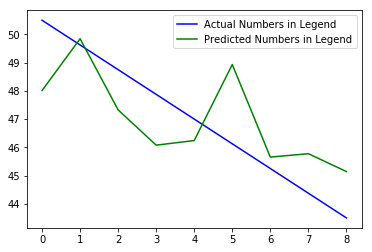

rmse of slice index 0 : 1.6592720817456914


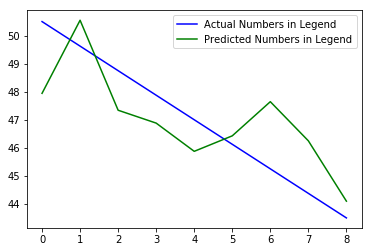

rmse of slice index 1 : 1.5395425808829066


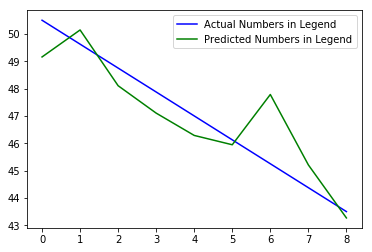

rmse of slice index 2 : 1.0952227390944553


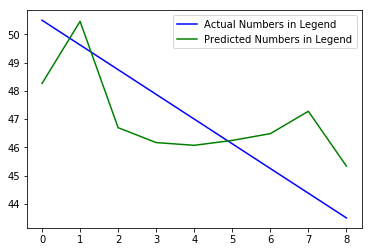

rmse of slice index 3 : 1.7330728972980491


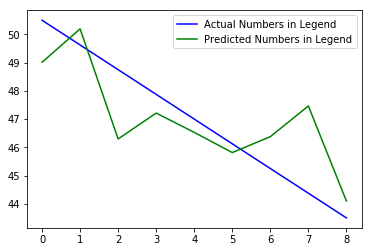

rmse of slice index 4 : 1.5090384730502495


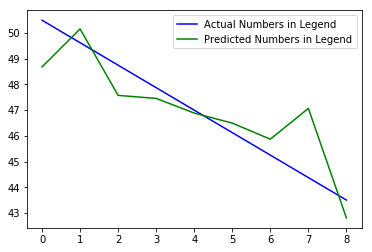

rmse of slice index 5 : 1.2210921945679343


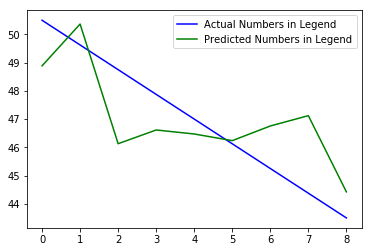

rmse of slice index 6 : 1.583718538998893


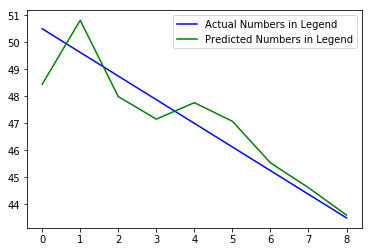

rmse of slice index 7 : 0.9648833527911314


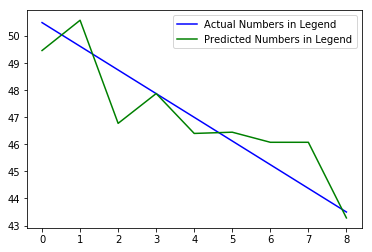

rmse of slice index 8 : 1.0526881271844375


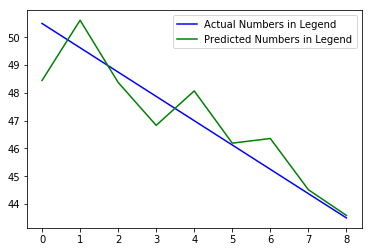

rmse of slice index 9 : 0.990417590658343


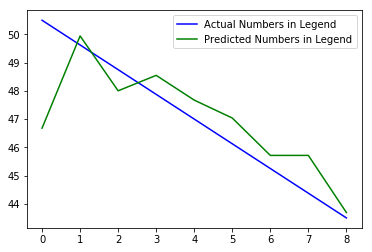

rmse of slice index 10 : 1.4548182806018715


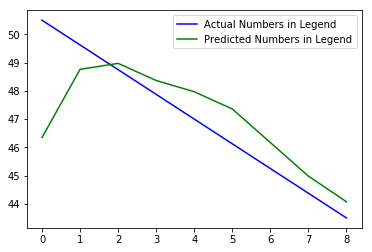

rmse of slice index 11 : 1.5728296989763333


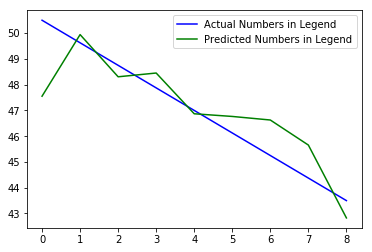

rmse of slice index 12 : 1.2355842361242833


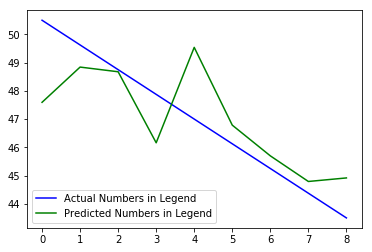

rmse of slice index 13 : 1.5372642516509045


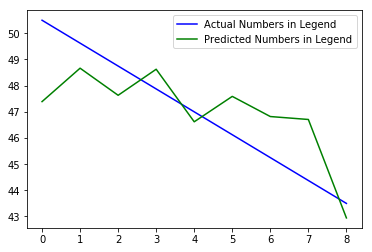

rmse of slice index 14 : 1.5953588052767398


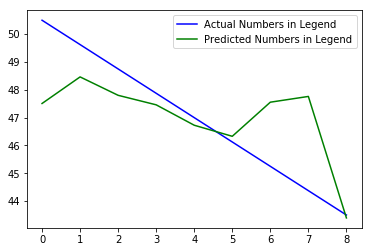

rmse of slice index 15 : 1.7725550653426176


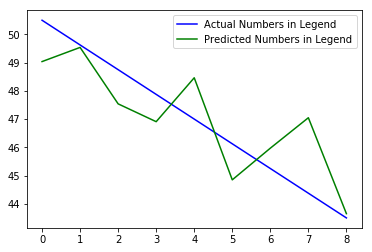

rmse of slice index 16 : 1.3334681027443733


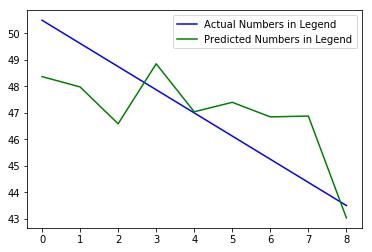

rmse of slice index 17 : 1.617556024055272


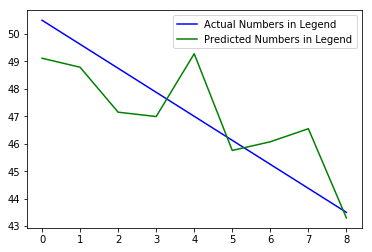

rmse of slice index 18 : 1.3634381701628968


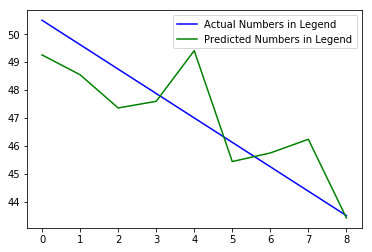

rmse of slice index 19 : 1.2787758001333767


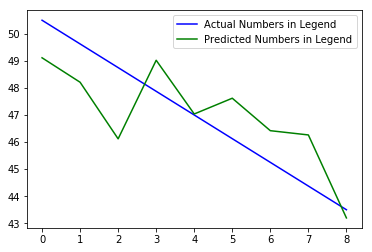

rmse of slice index 20 : 1.469044248702275


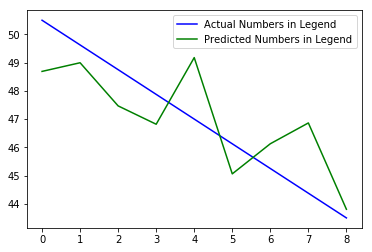

rmse of slice index 21 : 1.467068193067208


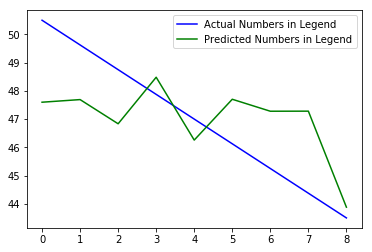

rmse of slice index 22 : 1.8840648498296253


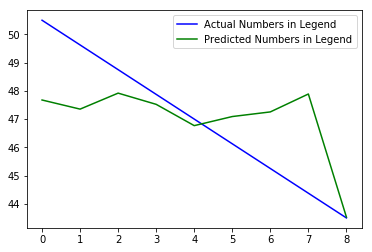

rmse of slice index 23 : 1.8647732083788018


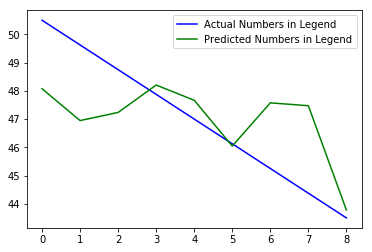

rmse of slice index 24 : 1.8554425828514034


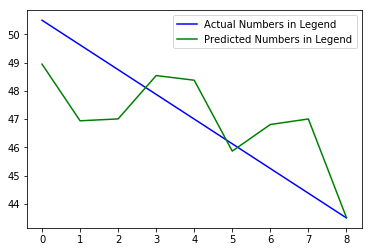

rmse of slice index 25 : 1.6470683889934092


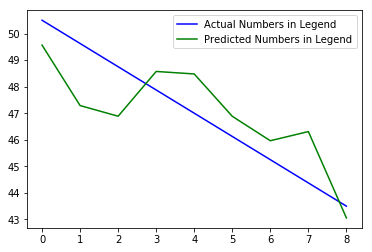

rmse of slice index 26 : 1.3945034003171648


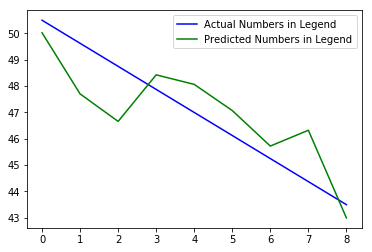

rmse of slice index 27 : 1.286513257690824


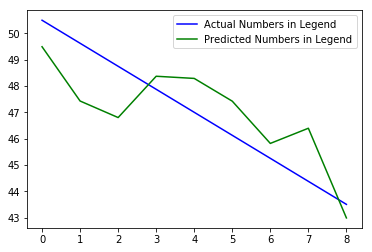

rmse of slice index 28 : 1.4098929644951586


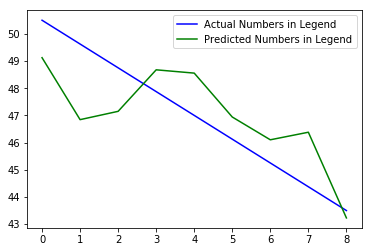

rmse of slice index 29 : 1.518111534784091


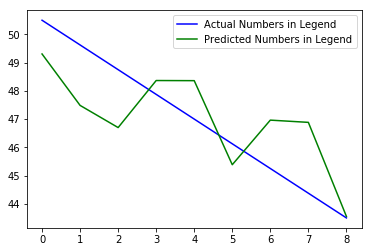

rmse of slice index 30 : 1.5664310534000876


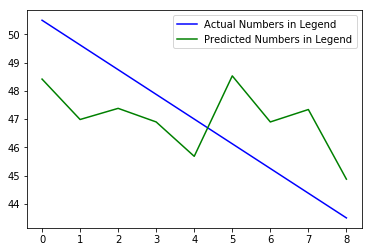

rmse of slice index 31 : 1.9733116580109702


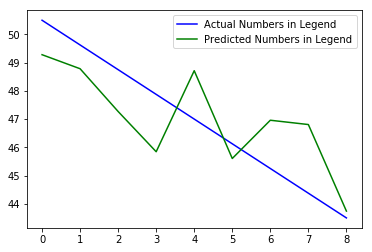

rmse of slice index 32 : 1.5134650769811826


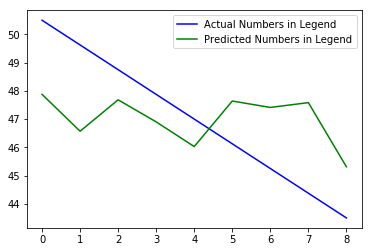

rmse of slice index 33 : 2.1026734657222734


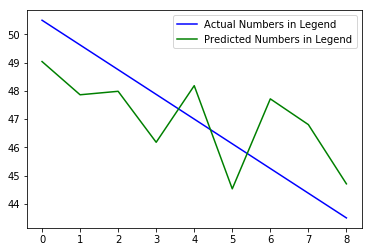

rmse of slice index 34 : 1.702808124302215


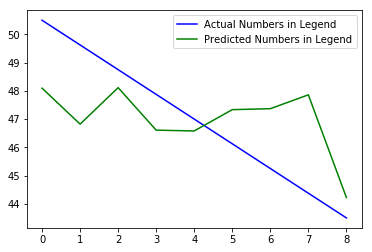

rmse of slice index 35 : 1.956028519445138


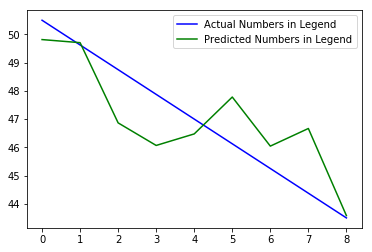

rmse of slice index 36 : 1.3417401615930493


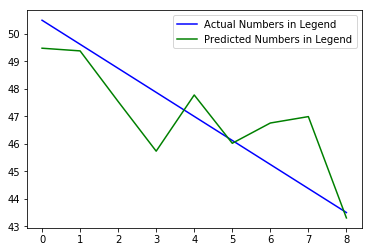

rmse of slice index 37 : 1.3709355539955972


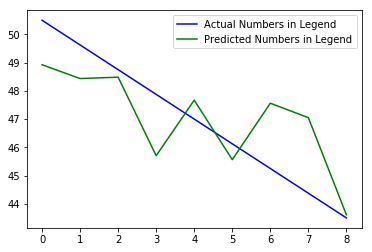

rmse of slice index 38 : 1.562090800368752


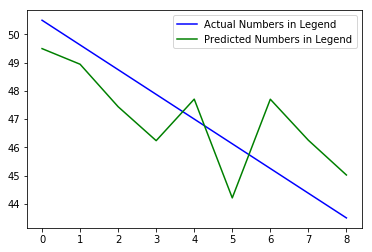

rmse of slice index 39 : 1.5598903632589052


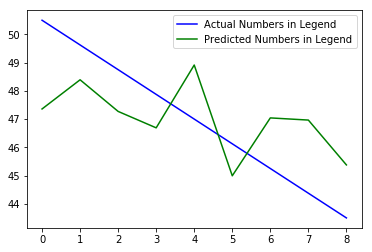

rmse of slice index 40 : 1.9255661029411697


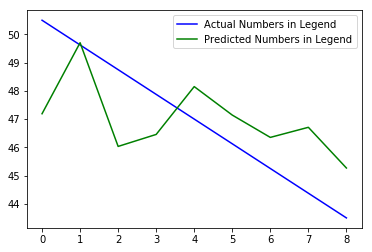

rmse of slice index 41 : 1.9005605263998993


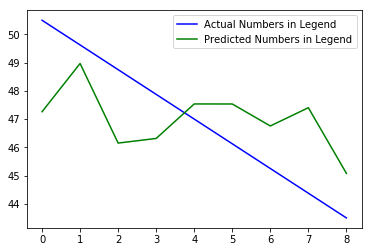

rmse of slice index 42 : 2.008767742277418


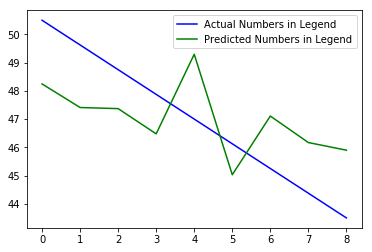

rmse of slice index 43 : 1.9073063447884433


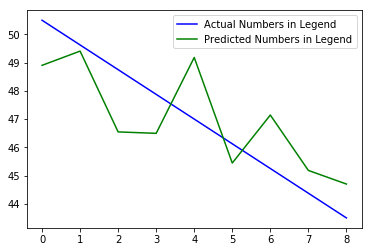

rmse of slice index 44 : 1.500357656221116


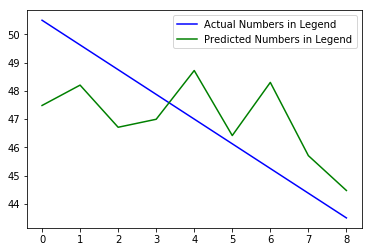

rmse of slice index 45 : 1.8595502451745194


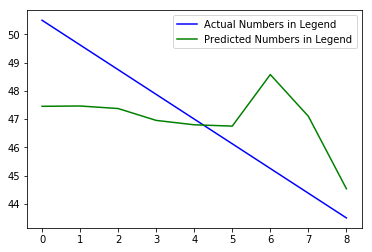

rmse of slice index 46 : 2.019170792467422


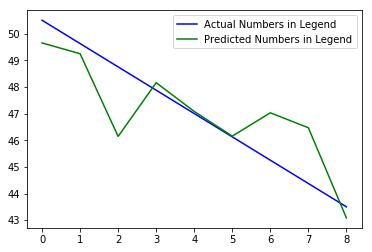

rmse of slice index 47 : 1.311000685997274


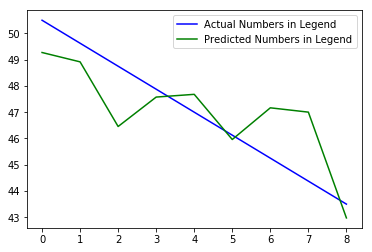

rmse of slice index 48 : 1.441599043866675


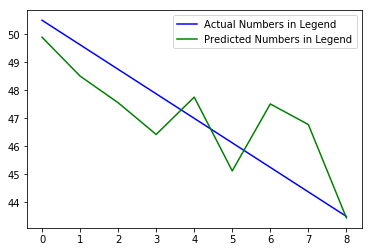

rmse of slice index 49 : 1.3991124185466994


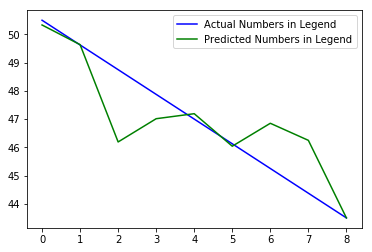

rmse of slice index 50 : 1.2218405847956895


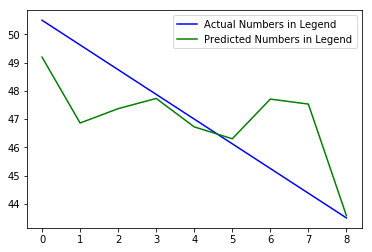

rmse of slice index 51 : 1.7446190142091038


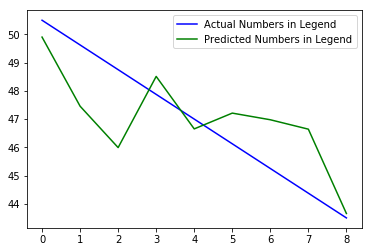

rmse of slice index 52 : 1.581989041507955


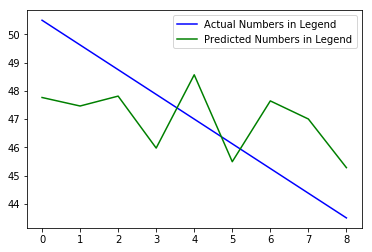

rmse of slice index 53 : 1.9809079769492424


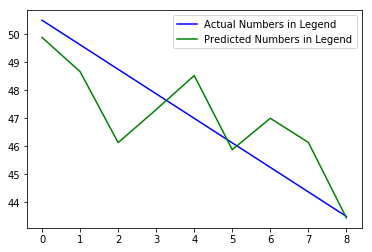

rmse of slice index 54 : 1.3757700285446348


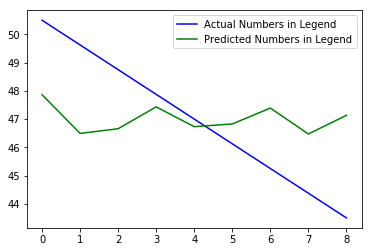

rmse of slice index 55 : 2.213155840645418


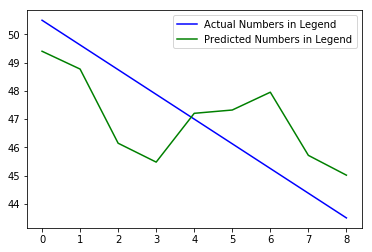

rmse of slice index 56 : 1.7428121424064626


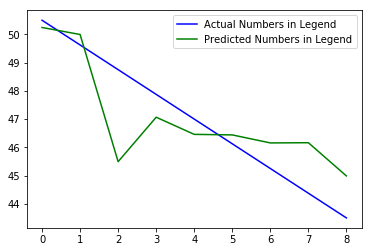

rmse of slice index 57 : 1.4178479598516887


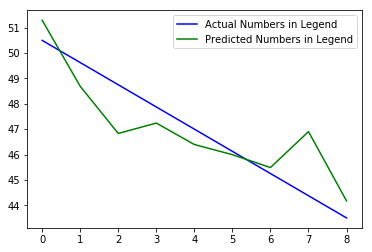

rmse of slice index 58 : 1.195846381516948


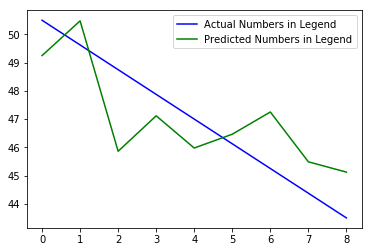

rmse of slice index 59 : 1.5002438643107527


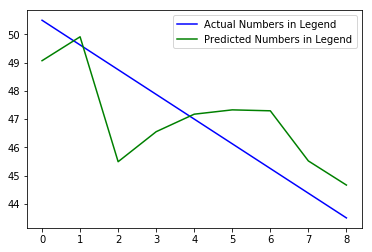

rmse of slice index 60 : 1.5921797198822805


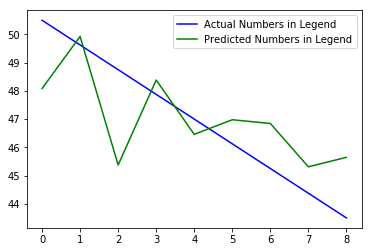

rmse of slice index 61 : 1.7204097823091475


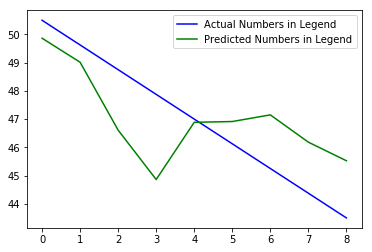

rmse of slice index 62 : 1.7016407108798794


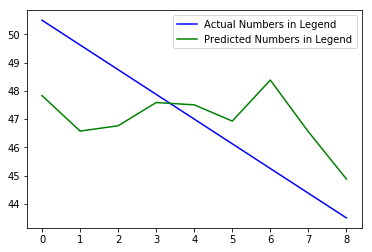

rmse of slice index 63 : 2.0493326895417323


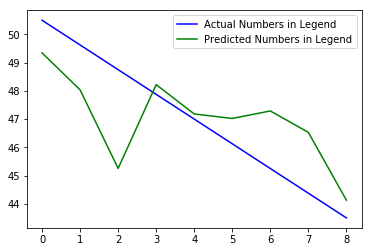

rmse of slice index 64 : 1.7073482699857059


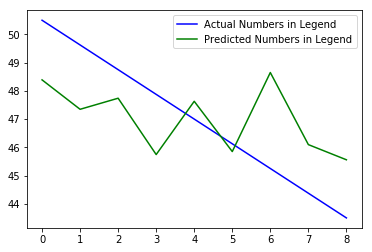

rmse of slice index 65 : 1.9559842244381827


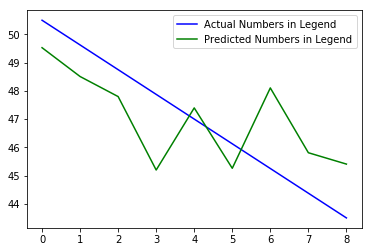

rmse of slice index 66 : 1.6671944069465432


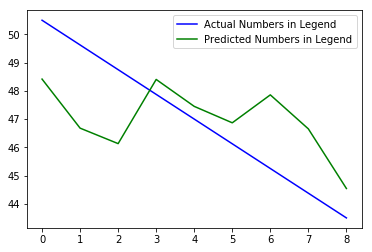

rmse of slice index 67 : 1.9432419926278652


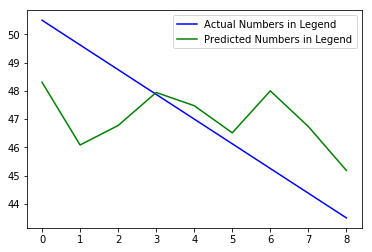

rmse of slice index 68 : 2.0443747064604447


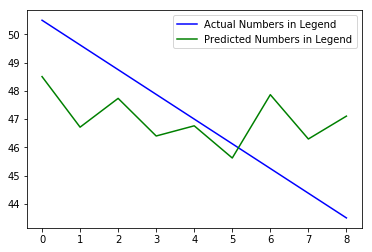

rmse of slice index 69 : 2.094575673906361


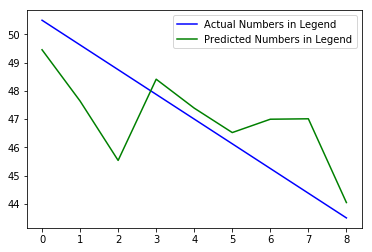

rmse of slice index 70 : 1.707892921162042


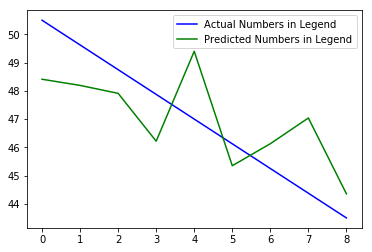

rmse of slice index 71 : 1.6609955273438997


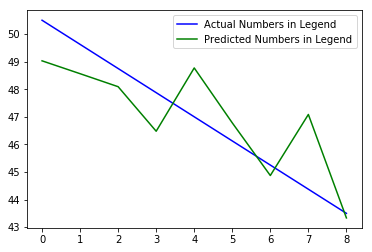

rmse of slice index 72 : 1.3645402498107178


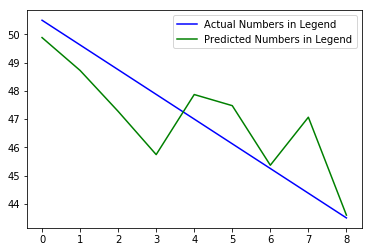

rmse of slice index 73 : 1.404897531454734


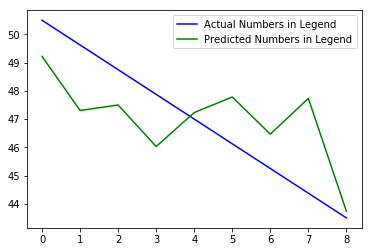

rmse of slice index 74 : 1.7508284387700421


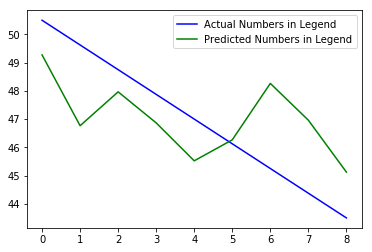

rmse of slice index 75 : 1.8831677751961555


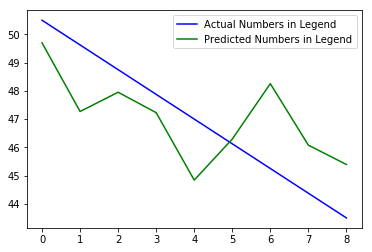

rmse of slice index 76 : 1.7464267630044568


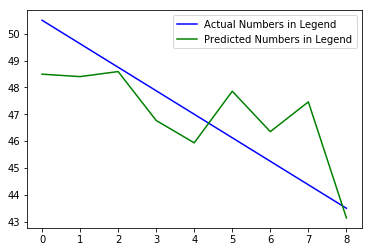

rmse of slice index 77 : 1.555491131326462


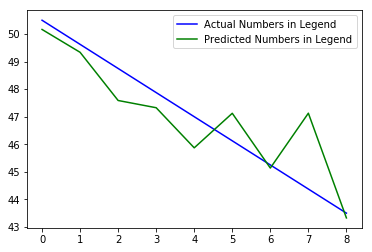

rmse of slice index 78 : 1.1419826275758616


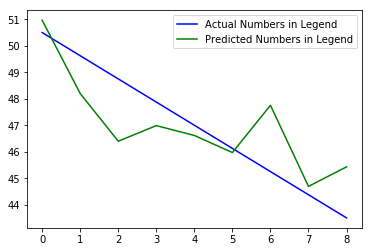

rmse of slice index 79 : 1.4466077017054435


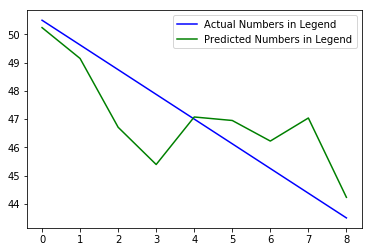

rmse of slice index 80 : 1.4861889023632011


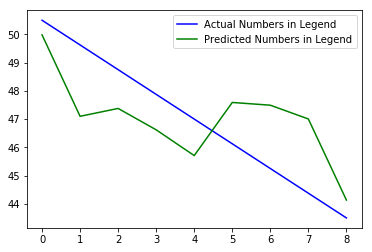

rmse of slice index 81 : 1.7082603412326627


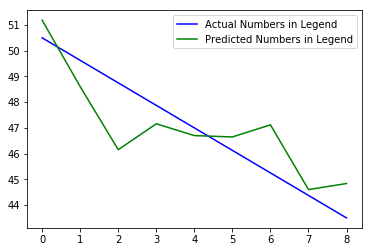

rmse of slice index 82 : 1.2679209079357223


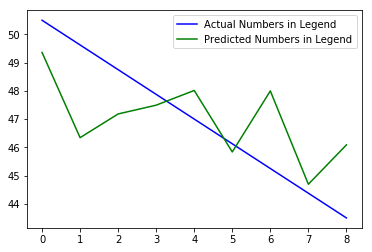

rmse of slice index 83 : 1.8295580170143122


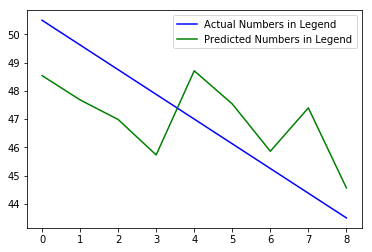

rmse of slice index 84 : 1.8523912566595293


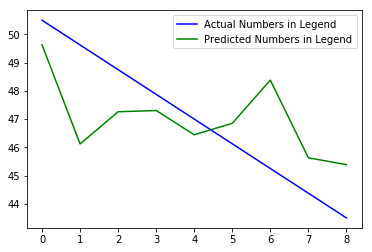

rmse of slice index 85 : 1.8670034907226498


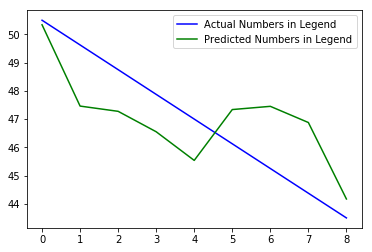

rmse of slice index 86 : 1.62666361179097


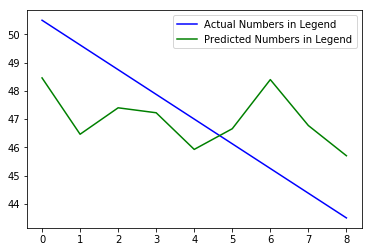

rmse of slice index 87 : 2.064336433494979


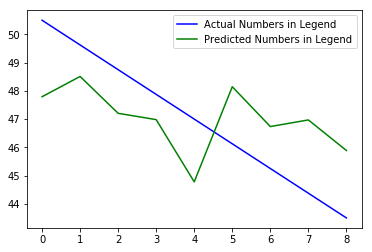

rmse of slice index 88 : 1.984164425457009


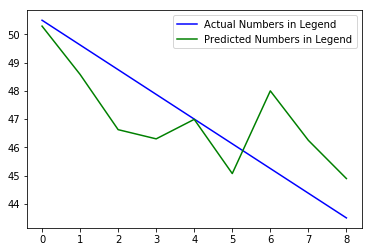

rmse of slice index 89 : 1.5721794922095669


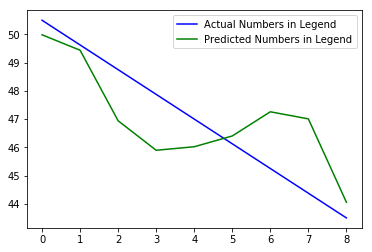

rmse of slice index 90 : 1.483426659357774


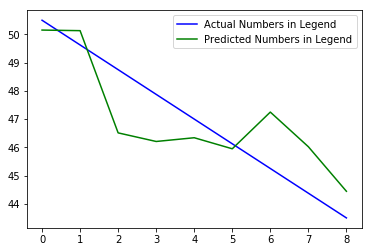

rmse of slice index 91 : 1.3427662388946977


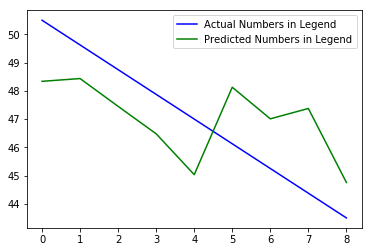

rmse of slice index 92 : 1.864595302891544


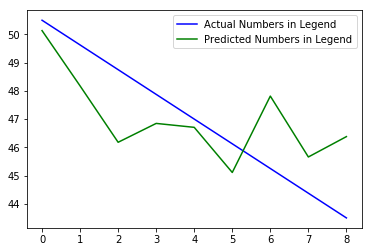

rmse of slice index 93 : 1.7492023097182672


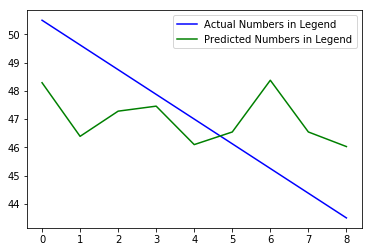

rmse of slice index 94 : 2.096167662758317


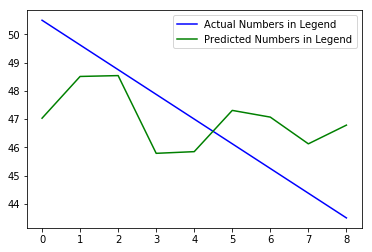

rmse of slice index 95 : 2.0432224631844167


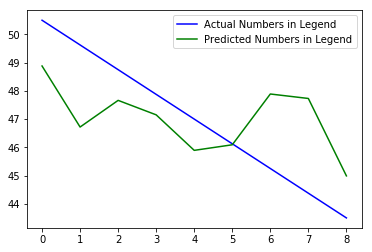

rmse of slice index 96 : 1.9562383743306546


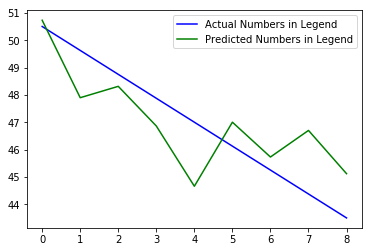

rmse of slice index 97 : 1.4437082568174306


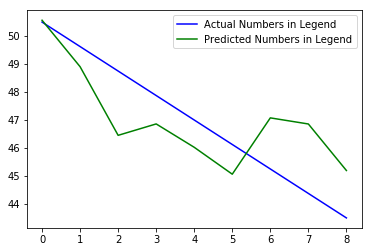

rmse of slice index 98 : 1.5377871297543078


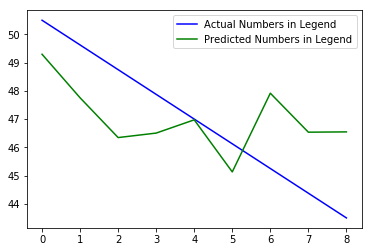

rmse of slice index 99 : 1.9625391042157345


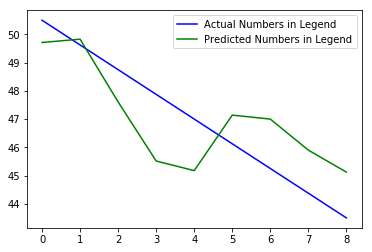

rmse of slice index 100 : 1.4874731391177907


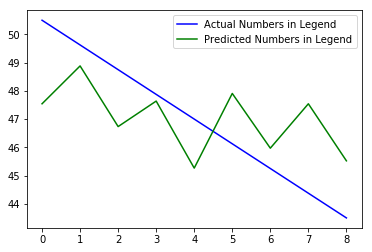

rmse of slice index 101 : 1.9506740030332226


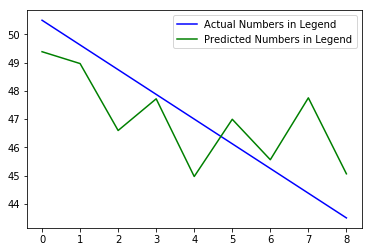

rmse of slice index 102 : 1.6724779972726556


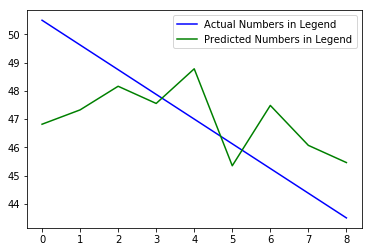

rmse of slice index 103 : 1.9655231821363184


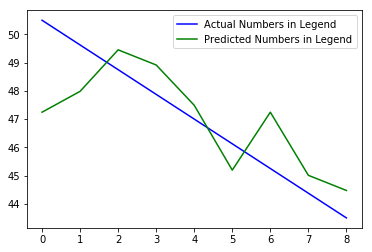

rmse of slice index 104 : 1.5386855991765085


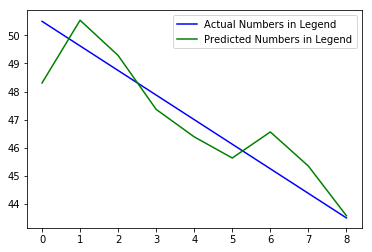

rmse of slice index 105 : 1.0264879834429659


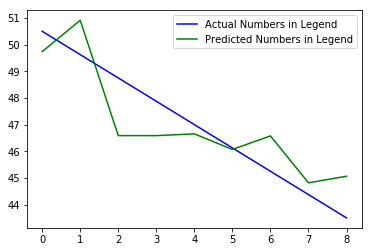

rmse of slice index 106 : 1.2069560537312622


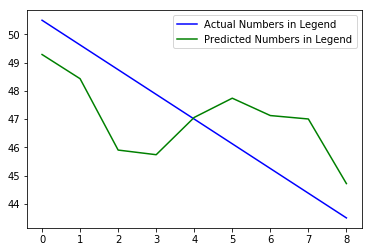

rmse of slice index 107 : 1.8283854640602362


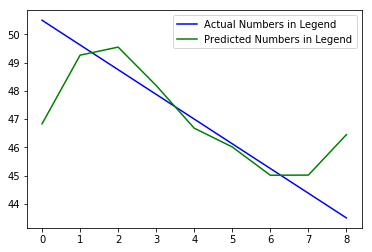

rmse of slice index 108 : 1.6196144883871946


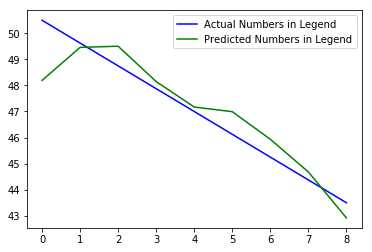

rmse of slice index 109 : 0.9237982312301866


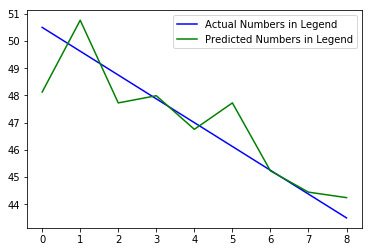

rmse of slice index 110 : 1.1145330034960474


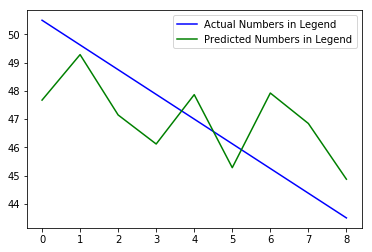

rmse of slice index 111 : 1.8366133871521249


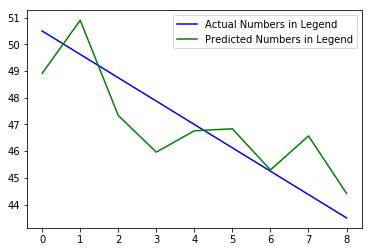

rmse of slice index 112 : 1.3345653170340175


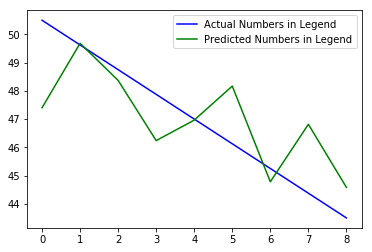

rmse of slice index 113 : 1.6310168156295042


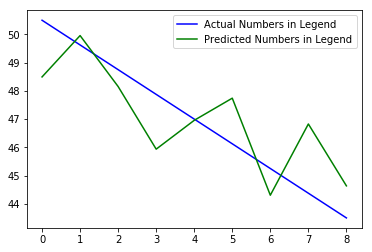

rmse of slice index 114 : 1.4554003179079724


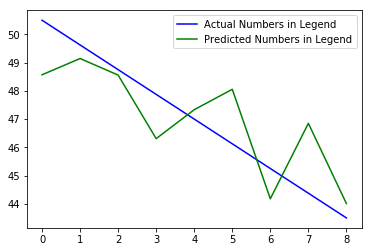

rmse of slice index 115 : 1.4067909930457208


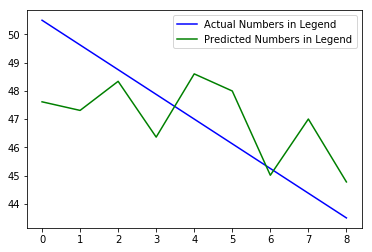

rmse of slice index 116 : 1.8504157438674704


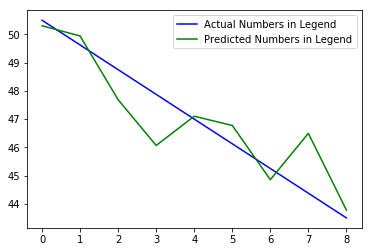

rmse of slice index 117 : 1.0384587101693654


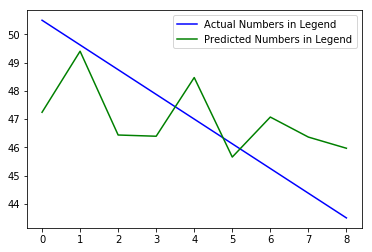

rmse of slice index 118 : 1.9427183089655704


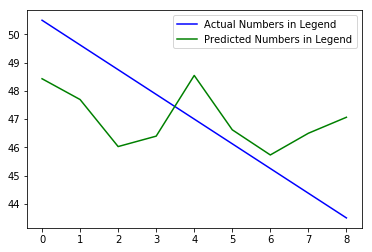

rmse of slice index 119 : 2.0468159789115816


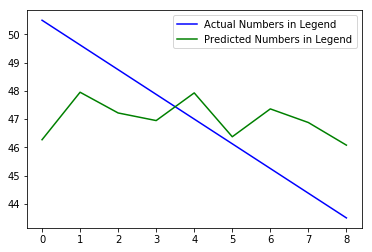

rmse of slice index 120 : 2.1653994406034296


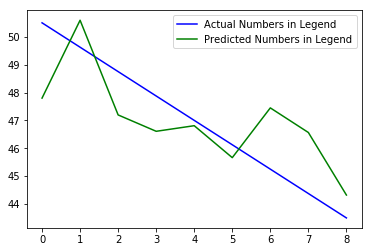

rmse of slice index 121 : 1.5918847403740684


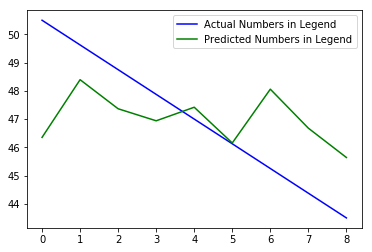

rmse of slice index 122 : 2.0941095714953506


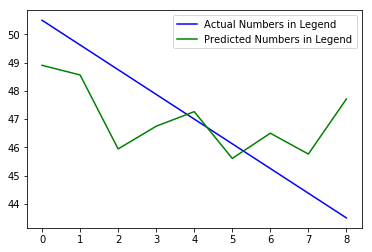

rmse of slice index 123 : 1.9547190012700906


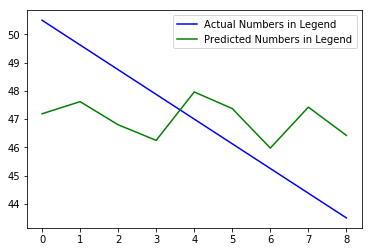

rmse of slice index 124 : 2.167581300429709


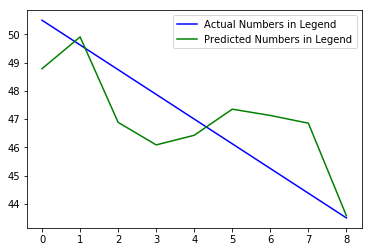

rmse of slice index 125 : 1.535669589577351


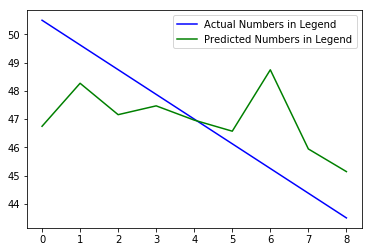

rmse of slice index 126 : 2.0058560650673676


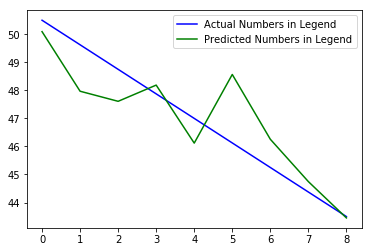

rmse of slice index 127 : 1.16415454324017


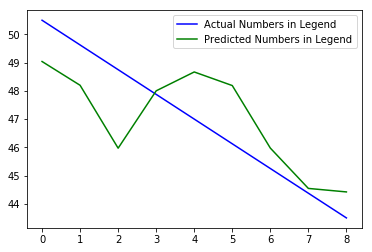

rmse of slice index 128 : 1.503904003203172


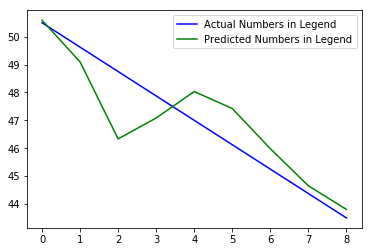

rmse of slice index 129 : 1.0651679852653029


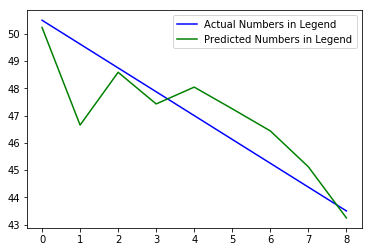

rmse of slice index 130 : 1.2256481851823697


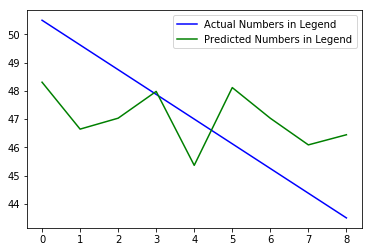

rmse of slice index 131 : 2.0567909354464278


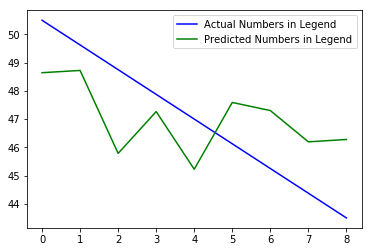

rmse of slice index 132 : 1.942582867075867


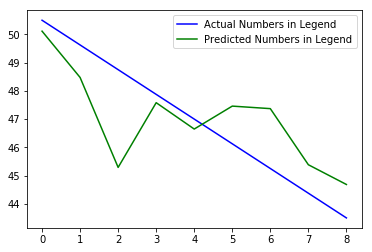

rmse of slice index 133 : 1.5761279915106003


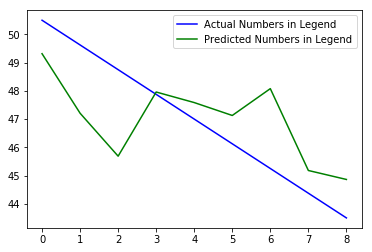

rmse of slice index 134 : 1.7790260166634193


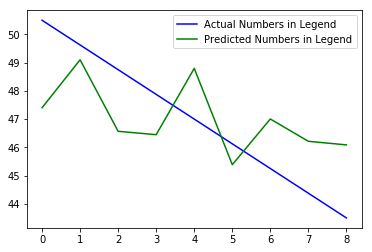

rmse of slice index 135 : 1.9317920432013371


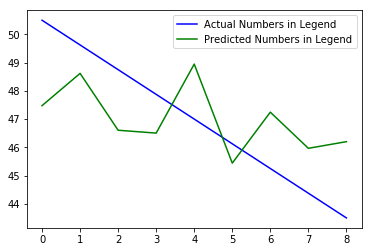

rmse of slice index 136 : 1.963455831171808


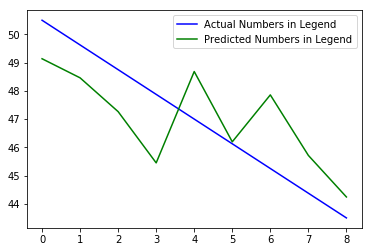

rmse of slice index 137 : 1.6085238143447675


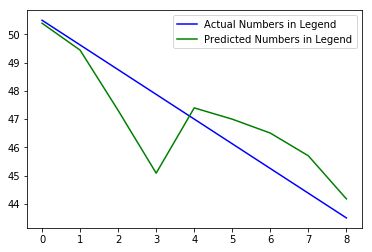

rmse of slice index 138 : 1.273916406384839


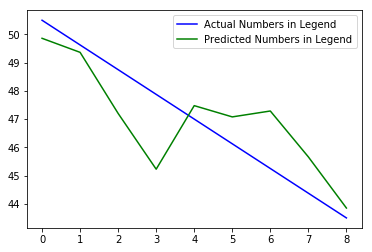

rmse of slice index 139 : 1.37239778569568


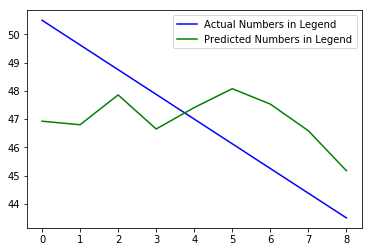

rmse of slice index 140 : 2.1060167989701837


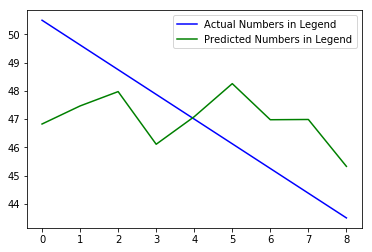

rmse of slice index 141 : 2.096632209344649


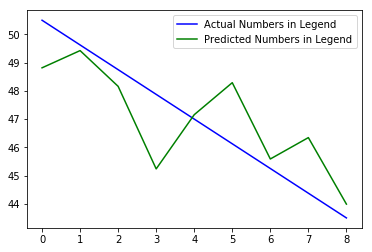

rmse of slice index 142 : 1.4578078866606732


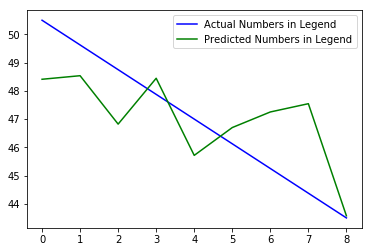

rmse of slice index 143 : 1.6877952893315178


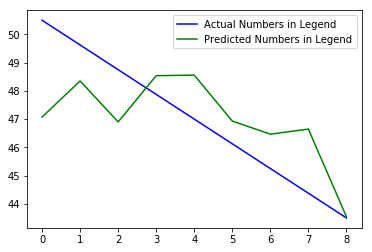

rmse of slice index 144 : 1.730443118396431


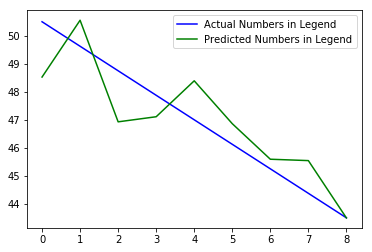

rmse of slice index 145 : 1.1846151683233515


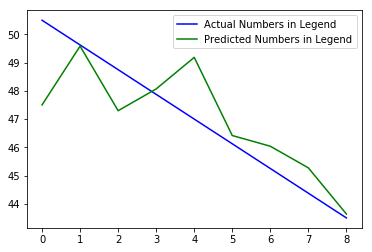

rmse of slice index 146 : 1.3925942230357924


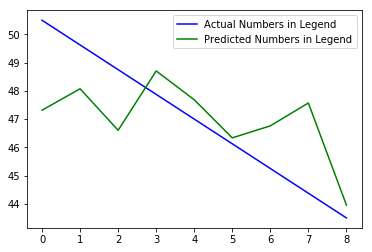

rmse of slice index 147 : 1.8579193631144706


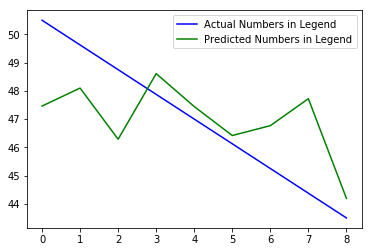

rmse of slice index 148 : 1.8984871289887741


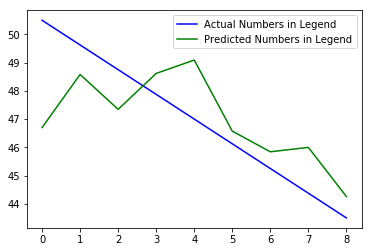

rmse of slice index 149 : 1.7059256883195975


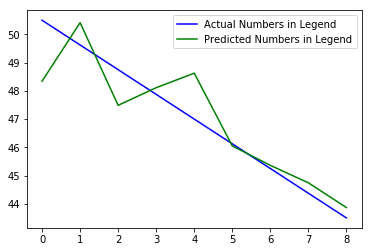

rmse of slice index 150 : 1.0469564429086495


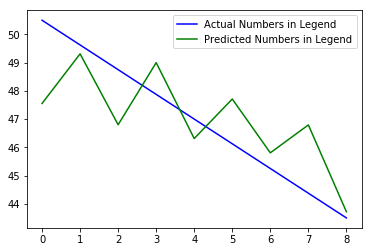

rmse of slice index 151 : 1.6000384083842631


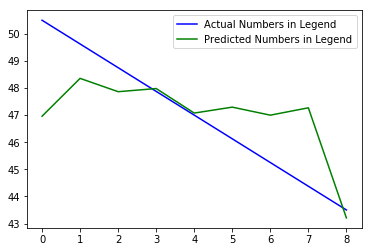

rmse of slice index 152 : 1.7587173419460431


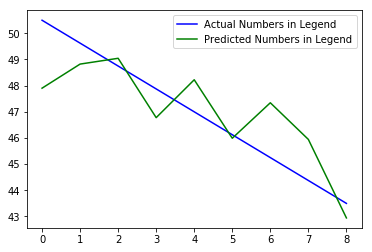

rmse of slice index 153 : 1.3888248314966278


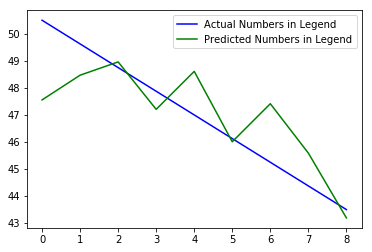

rmse of slice index 154 : 1.4664339429515971


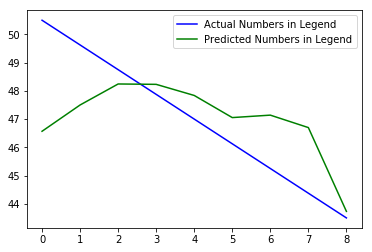

rmse of slice index 155 : 1.854401850554588


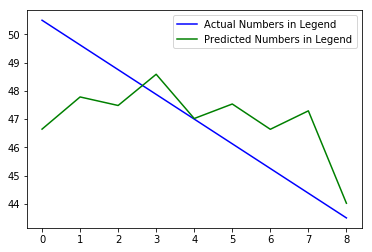

rmse of slice index 156 : 1.9167207160799367


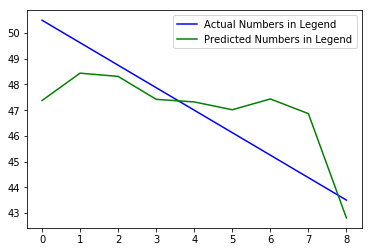

rmse of slice index 157 : 1.6302900462040624


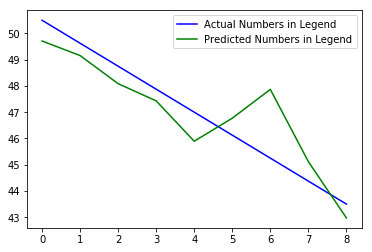

rmse of slice index 158 : 1.0955754899077266


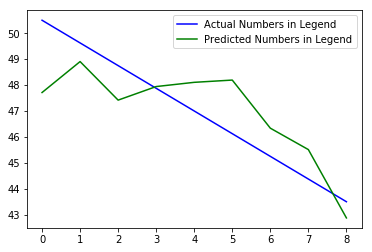

rmse of slice index 159 : 1.430790032906754


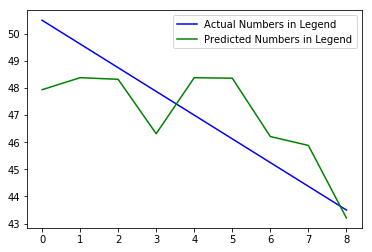

rmse of slice index 160 : 1.5249151885837966


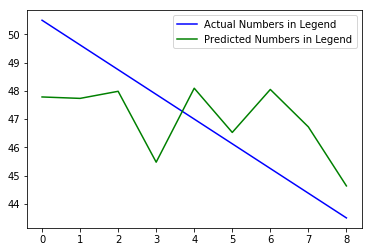

rmse of slice index 161 : 1.9235368454026036


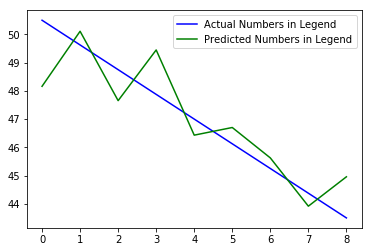

rmse of slice index 162 : 1.1791713807501065


In [84]:
lr_rmse_ = {}

for i in range(0,X_train.shape[0]):
    
    model = LinearRegression()

    model.fit(X_train[i,:,:], y_train)
    
    plt.plot(y_train, "b", label='Actual Numbers in Legend')

    y_test = model.predict(X_train[i,:,:])

    if i < 10:
        plt.plot(y_test, "g", label="Predicted Numbers in Legend")

        plt.legend()

        plt.show()
    
    print("rmse of slice index", i, ":", sqrt(mean_squared_error(y_train, y_test)))
    
    lr_rmse_[i] = sqrt(mean_squared_error(y_train, y_test))

In [96]:
#print(lr_rmse_)
print("---")
print("best result is with the slice index of:")
print(min(lr_rmse_, key=lr_rmse_.get))
key_min = min(lr_rmse_.keys(), key=(lambda k: lr_rmse_[k]))
print(lr_rmse_[key_min])

---
best result is with the slice index of:
109
0.9237982312301866


## Polynomial Regression Row-wise

In [ ]:
X_train = legend_img
y_train = np.linspace(50.5, 43.5, num=X_train.shape[1])

X_test = test_img
#y_test #user will manually asses the result with by comparing visuals

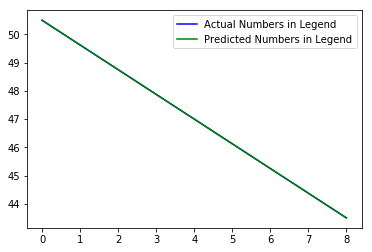

rmse of slice index 0 : 0.0006355997457606326


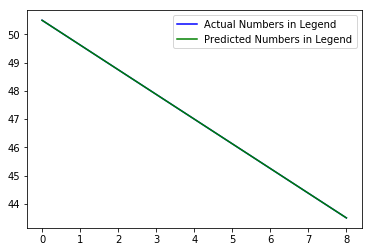

rmse of slice index 1 : 8.631674575031098e-05


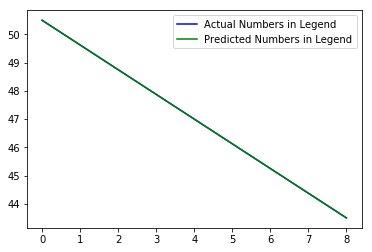

rmse of slice index 2 : 9.966999278902906e-05


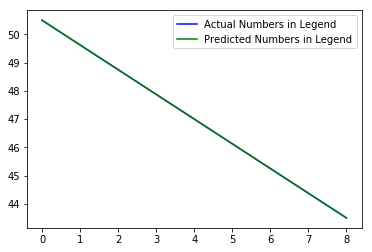

rmse of slice index 3 : 0.0002153117928926262


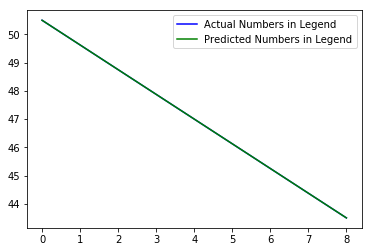

rmse of slice index 4 : 0.0003229676893389393


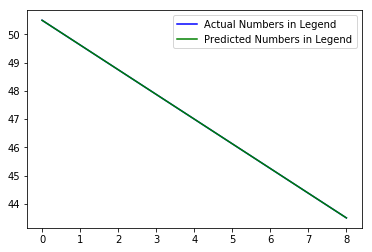

rmse of slice index 5 : 0.0003255208333333333


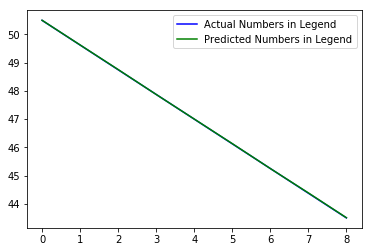

rmse of slice index 6 : 0.00637887953849786


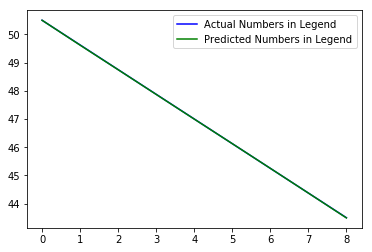

rmse of slice index 7 : 0.004367320268554277


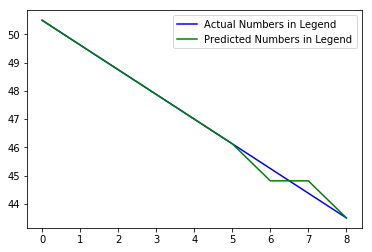

rmse of slice index 8 : 0.20623948637579553


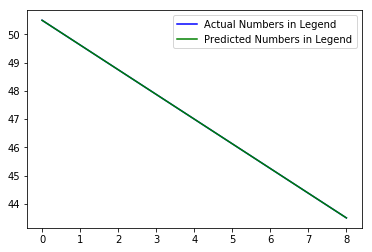

rmse of slice index 9 : 4.0690104166666664e-05


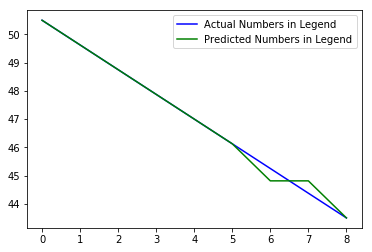

rmse of slice index 10 : 0.20623957449530006


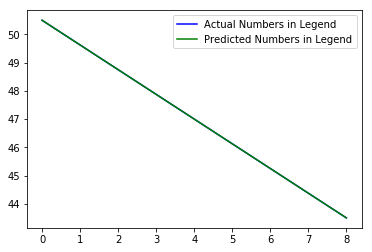

rmse of slice index 11 : 4.878572106234456e-05


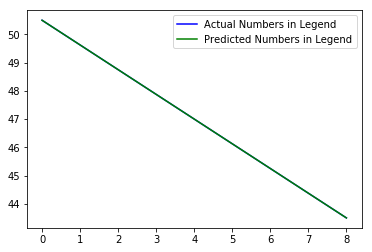

rmse of slice index 12 : 1.886036806003739e-05


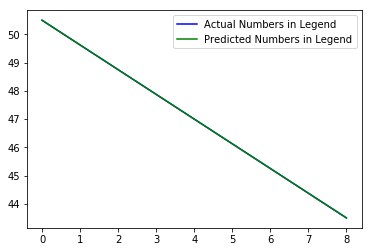

rmse of slice index 13 : 0.00023017798866749594


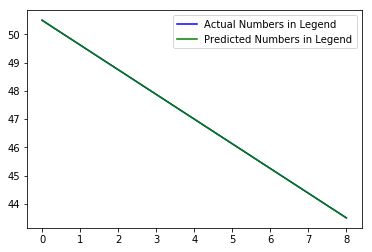

rmse of slice index 14 : 2.8319113987376007e-05


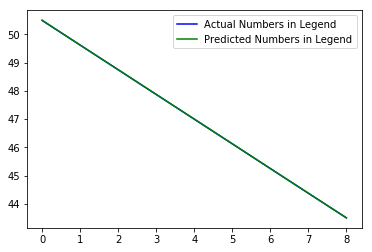

rmse of slice index 15 : 0.003001153794691695


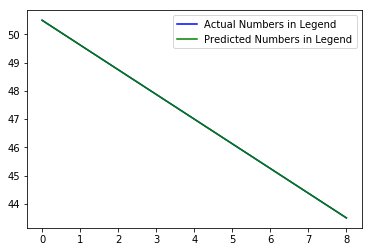

rmse of slice index 16 : 0.00017263349150062197


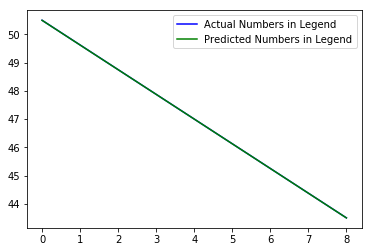

rmse of slice index 17 : 0.0016992686375179931


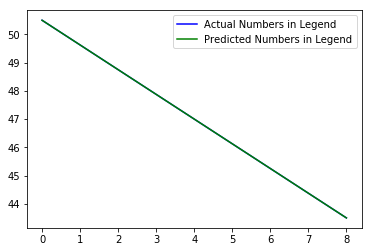

rmse of slice index 18 : 5.1368738496714675e-05


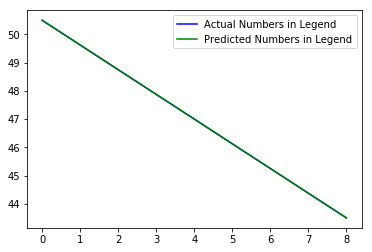

rmse of slice index 19 : 0.0008764916678278815


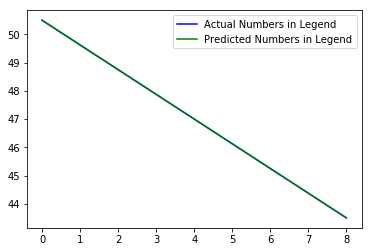

rmse of slice index 20 : 0.0006510416666666666


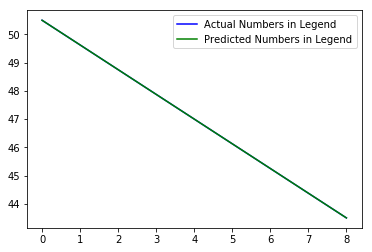

rmse of slice index 21 : 0.00031518419158589004


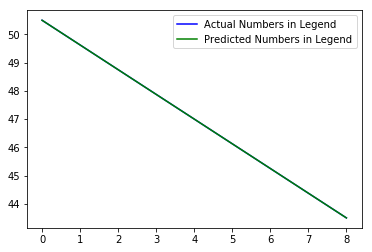

rmse of slice index 22 : 0.0004603559773349919


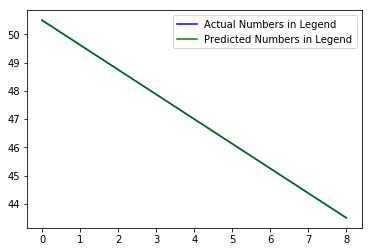

rmse of slice index 23 : 0.00028772248583436993


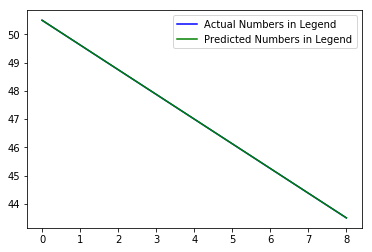

rmse of slice index 24 : 0.00042090171031854655


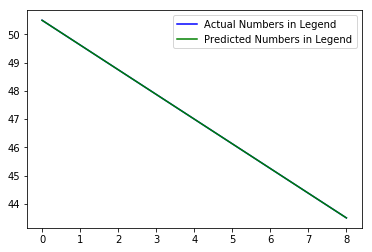

rmse of slice index 25 : 0.00022791907249357178


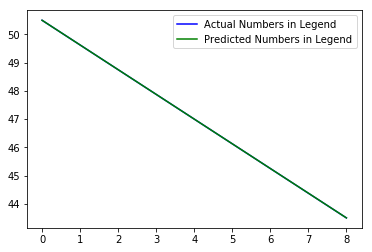

rmse of slice index 26 : 0.0009490481599683106


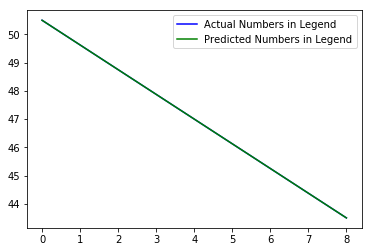

rmse of slice index 27 : 0.00015759209579294502


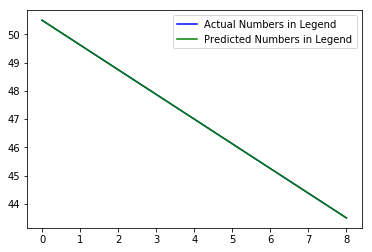

rmse of slice index 28 : 5.7544497166873984e-05


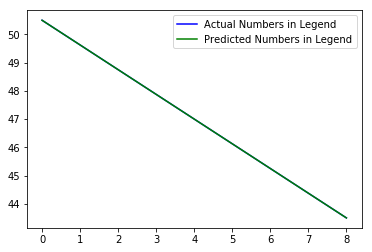

rmse of slice index 29 : 0.0002759737135060737


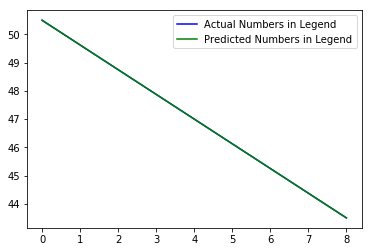

rmse of slice index 30 : 0.00019514288424937824


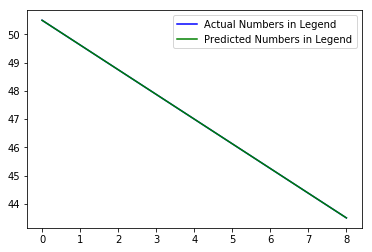

rmse of slice index 31 : 0.00023017798866749594


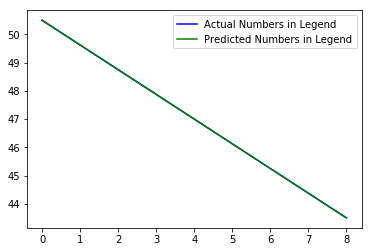

rmse of slice index 32 : 0.00042869684866751056


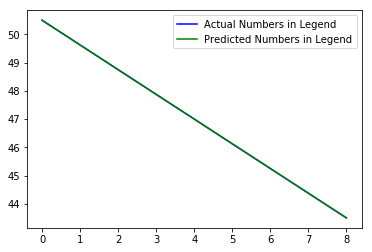

rmse of slice index 33 : 0.0002573468147923486


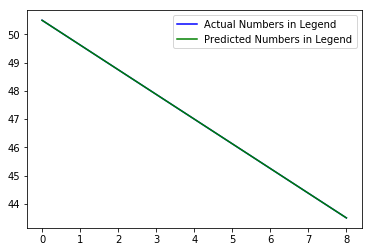

rmse of slice index 34 : 0.00016276041666666666


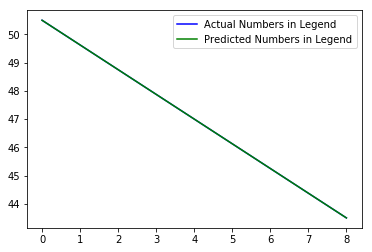

rmse of slice index 35 : 0.0001467102569768876


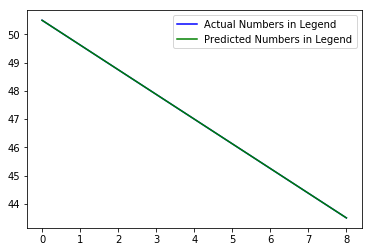

rmse of slice index 36 : 0.0002573468147923486


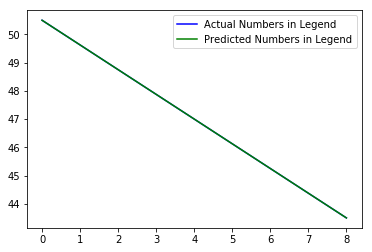

rmse of slice index 37 : 0.0002934205139537752


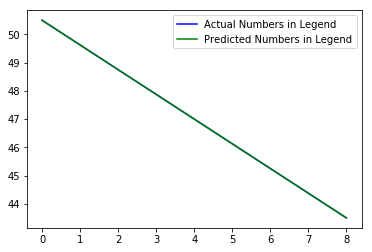

rmse of slice index 38 : 0.00019933998557805811


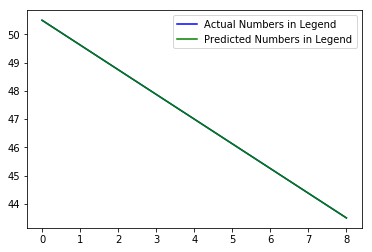

rmse of slice index 39 : 9.09858389282141e-05


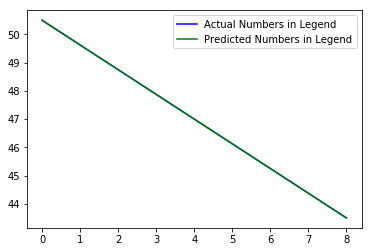

rmse of slice index 40 : 9.09858389282141e-05


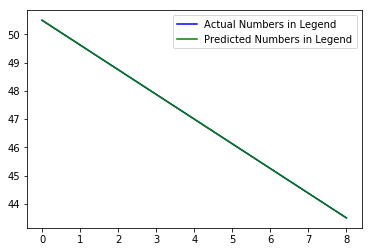

rmse of slice index 41 : 0.0001819716778564282


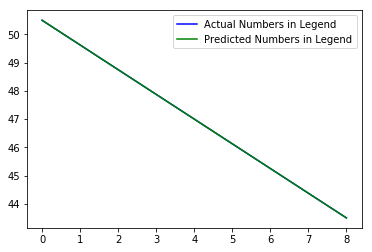

rmse of slice index 42 : 0.00028190931112774694


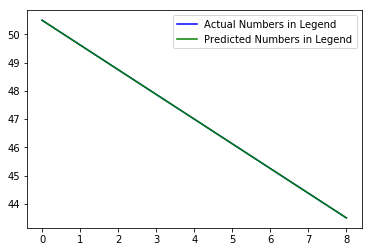

rmse of slice index 43 : 5.0862630208333336e-05


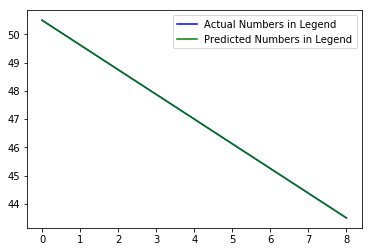

rmse of slice index 44 : 8.138020833333333e-05


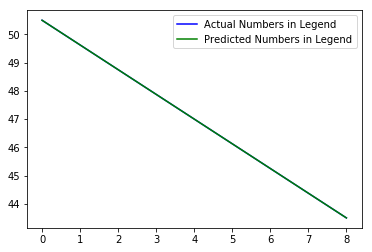

rmse of slice index 45 : 0.00011508899433374797


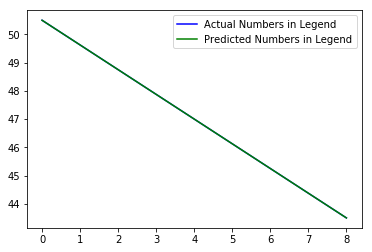

rmse of slice index 46 : 8.631674575031098e-05


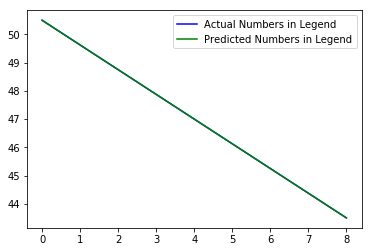

rmse of slice index 47 : 0.0003639433557128564


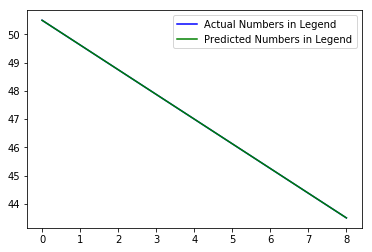

rmse of slice index 48 : 0.00039867997115611623


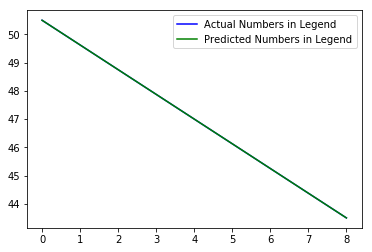

rmse of slice index 49 : 0.00039867997115611623


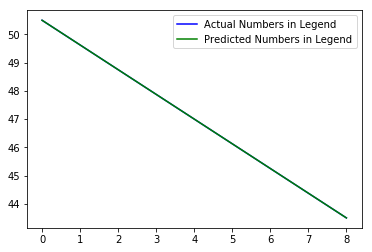

rmse of slice index 50 : 0.00037293096475877606


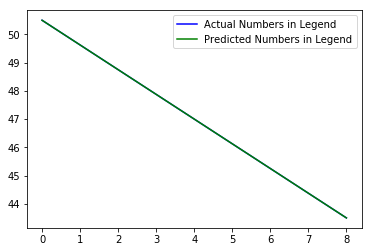

rmse of slice index 51 : 0.00014095465556387347


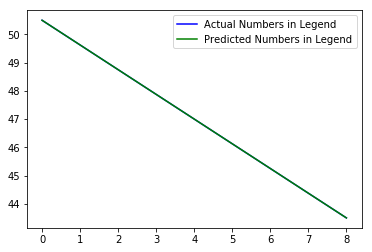

rmse of slice index 52 : 0.0003639433557128564


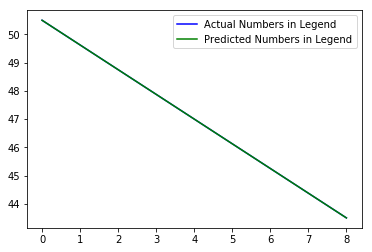

rmse of slice index 53 : 0.0005428737005259738


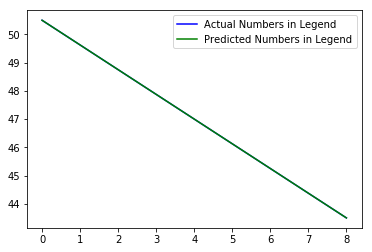

rmse of slice index 54 : 0.0003616615566941565


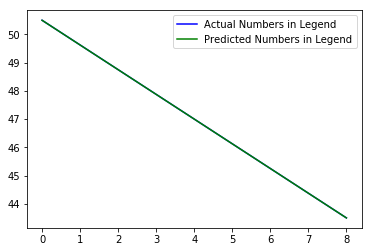

rmse of slice index 55 : 0.0007278867114257128


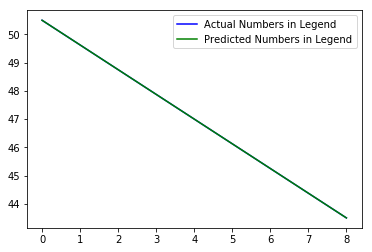

rmse of slice index 56 : 0.0003255208333333333


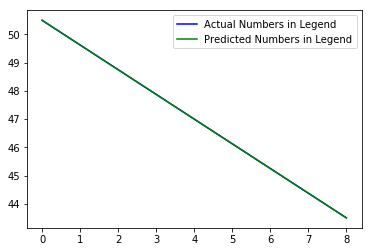

rmse of slice index 57 : 0.0007973599423122325


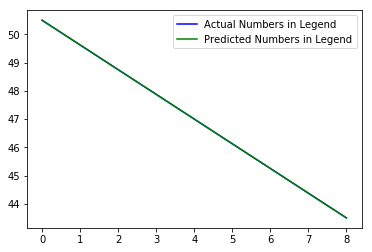

rmse of slice index 58 : 0.0016598370812476513


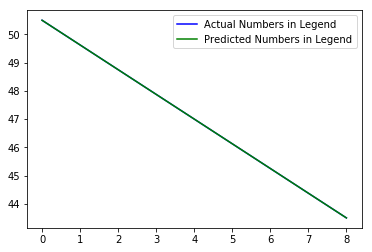

rmse of slice index 59 : 0.00034526698300124393


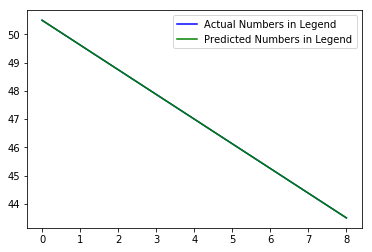

rmse of slice index 60 : 0.0004603559773349919


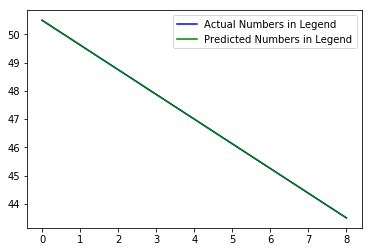

rmse of slice index 61 : 0.0002934205139537752


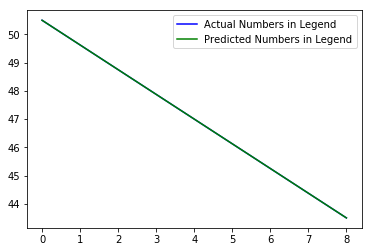

rmse of slice index 62 : 0.00021434842433375528


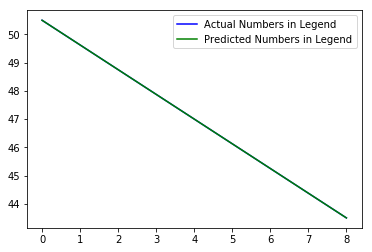

rmse of slice index 63 : 9.966999278902906e-05


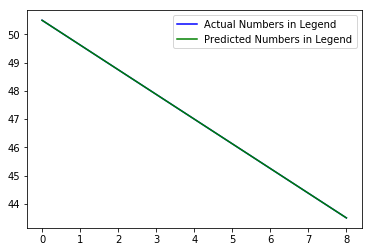

rmse of slice index 64 : 0.00015759209579294502


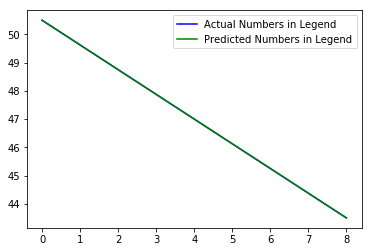

rmse of slice index 65 : 0.0001819716778564282


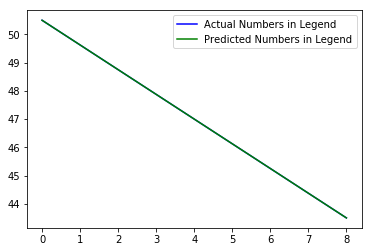

rmse of slice index 66 : 0.000244140625


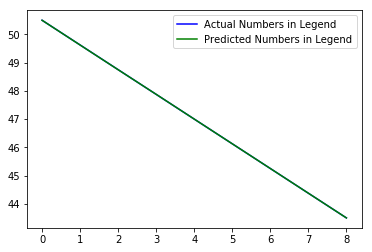

rmse of slice index 67 : 0.0011276372445109878


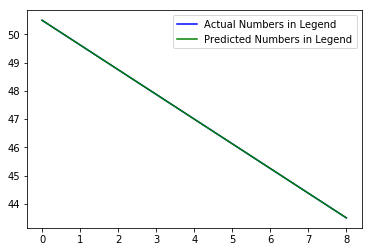

rmse of slice index 68 : 0.00026990761640262046


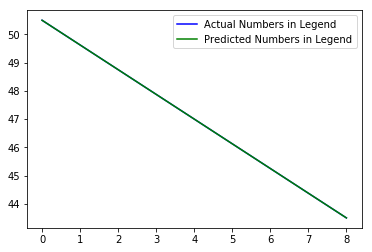

rmse of slice index 69 : 0.0003255208333333333


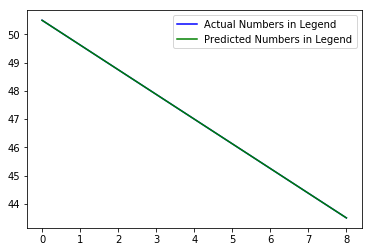

rmse of slice index 70 : 0.00028190931112774694


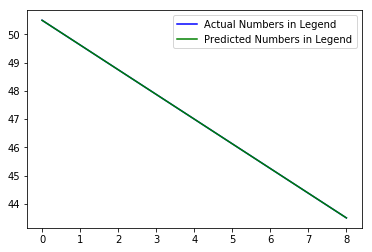

rmse of slice index 71 : 0.00048828125


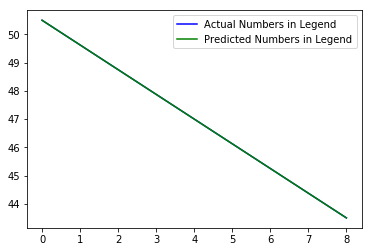

rmse of slice index 72 : 0.00028190931112774694


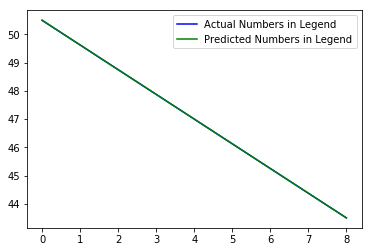

rmse of slice index 73 : 0.00039867997115611623


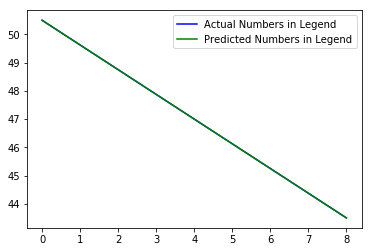

rmse of slice index 74 : 0.00024750824097893143


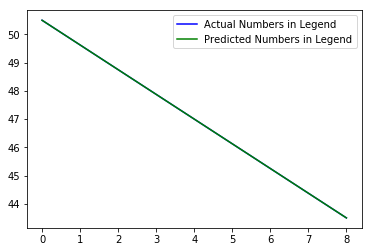

rmse of slice index 75 : 0.00018310546875


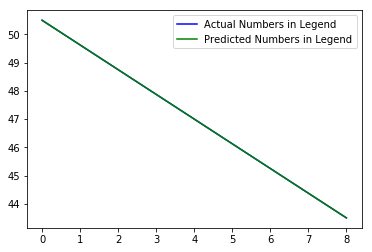

rmse of slice index 76 : 0.00048828125


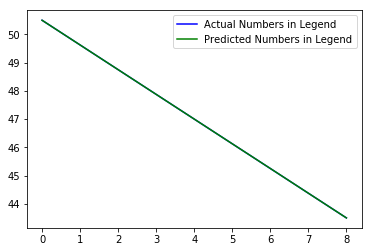

rmse of slice index 77 : 0.0003255208333333333


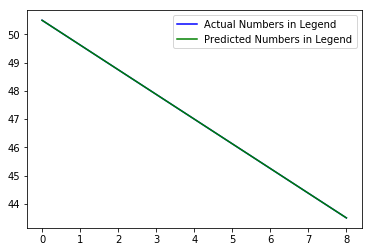

rmse of slice index 78 : 0.0002153117928926262


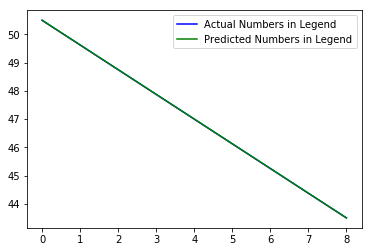

rmse of slice index 79 : 0.0005868410279075503


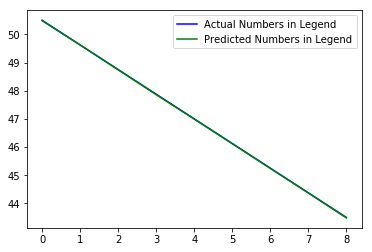

rmse of slice index 80 : 0.010737254233379324


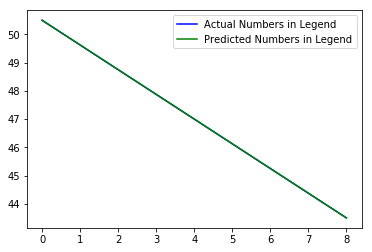

rmse of slice index 81 : 0.0002573468147923486


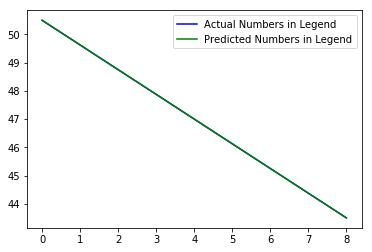

rmse of slice index 82 : 0.0007973599423122325


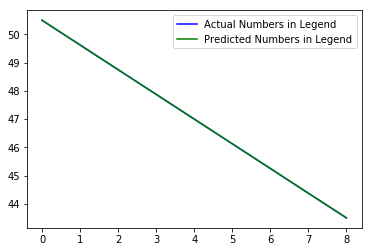

rmse of slice index 83 : 0.0024359748611809512


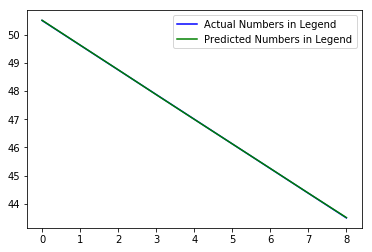

rmse of slice index 84 : 0.005675649666068585


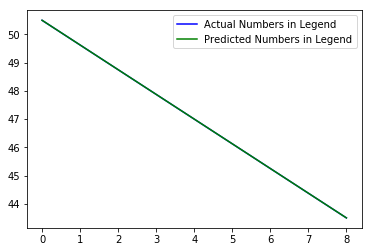

rmse of slice index 85 : 0.0010796304656104819


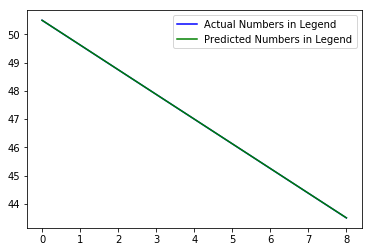

rmse of slice index 86 : 0.0012179874305904756


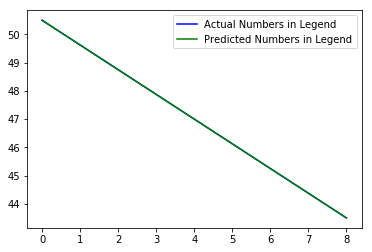

rmse of slice index 87 : 0.0003255208333333333


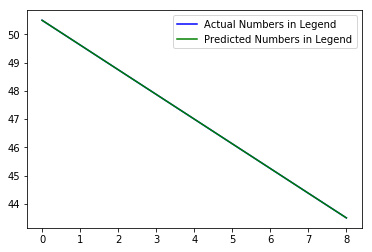

rmse of slice index 88 : 0.0005868410279075503


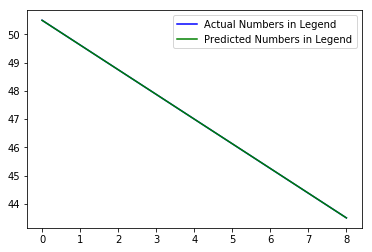

rmse of slice index 89 : 0.0009207119546699837


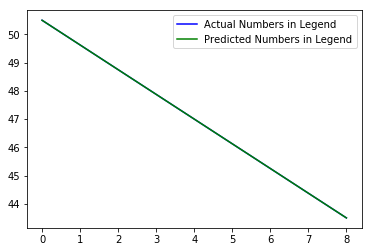

rmse of slice index 90 : 0.0001286734073961743


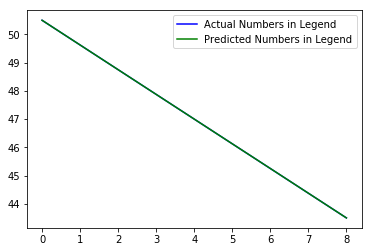

rmse of slice index 91 : 0.00048828125


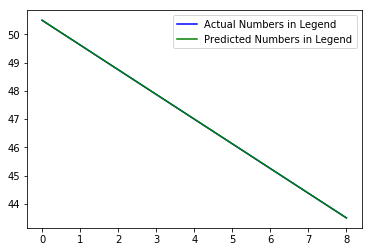

rmse of slice index 92 : 0.00019933998557805811


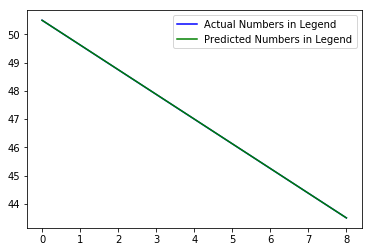

rmse of slice index 93 : 0.0013810679320049757


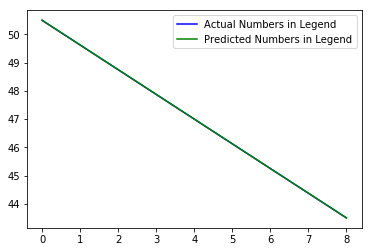

rmse of slice index 94 : 0.0012179874305904756


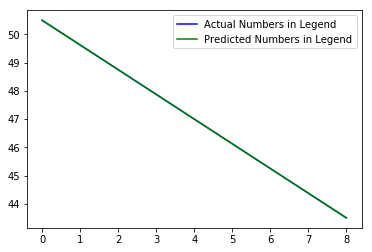

rmse of slice index 95 : 0.0013020833333333333


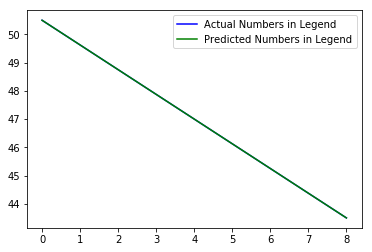

rmse of slice index 96 : 6.398389498600832e-05


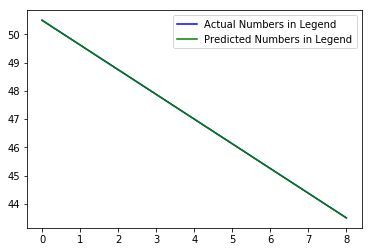

rmse of slice index 97 : 0.0007278867114257128


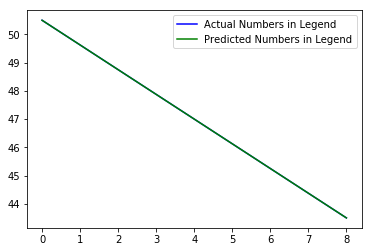

rmse of slice index 98 : 0.0003255208333333333


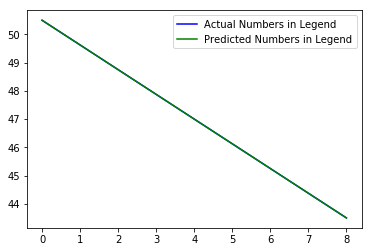

rmse of slice index 99 : 0.0001467102569768876


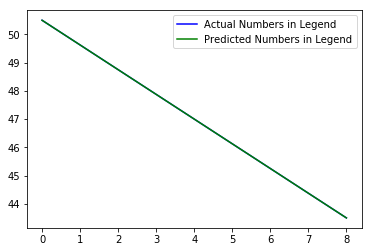

rmse of slice index 100 : 0.00026682285662036134


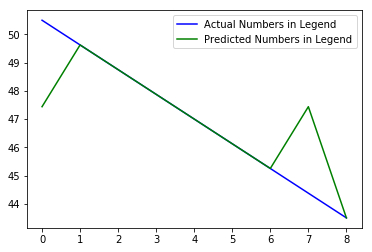

rmse of slice index 101 : 1.4436764188945526


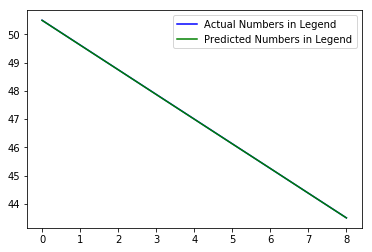

rmse of slice index 102 : 0.002911546845702851


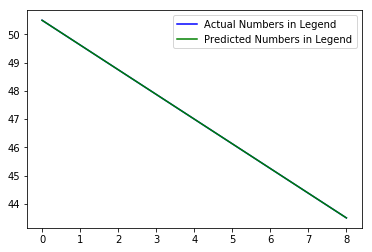

rmse of slice index 103 : 0.000244140625


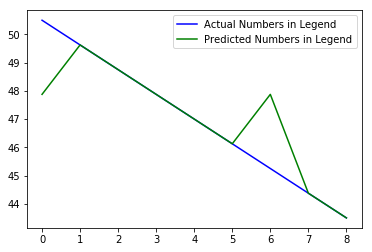

rmse of slice index 104 : 1.2374369921790023


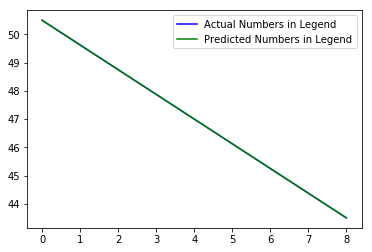

rmse of slice index 105 : 0.0003044968576476189


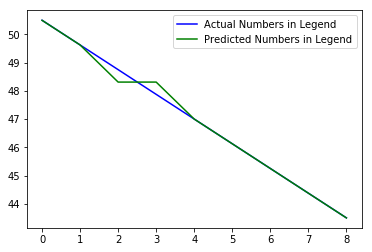

rmse of slice index 106 : 0.2062487258614895


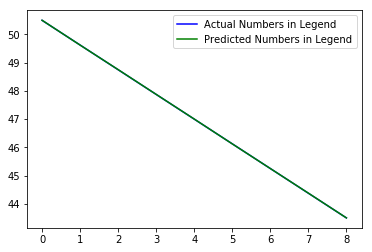

rmse of slice index 107 : 0.0024359748611809512


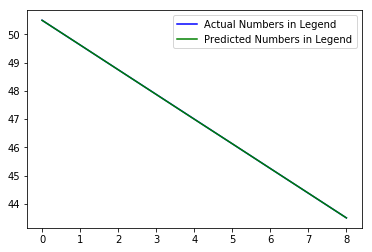

rmse of slice index 108 : 0.0016914558667664816


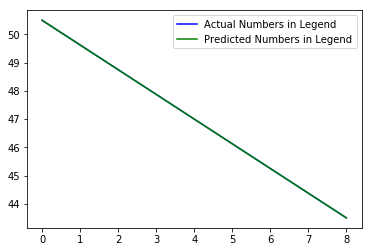

rmse of slice index 109 : 0.0009385223465715166


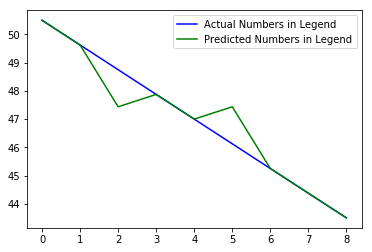

rmse of slice index 110 : 0.6187195467492264


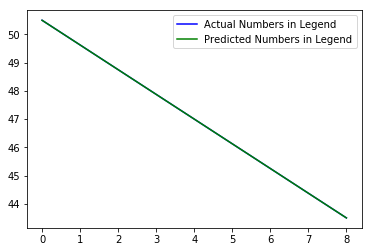

rmse of slice index 111 : 0.0003639433557128564


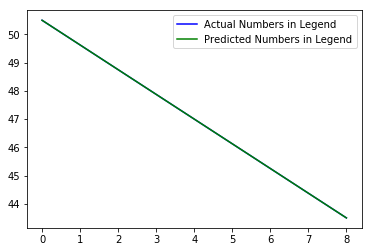

rmse of slice index 112 : 0.0003044968576476189


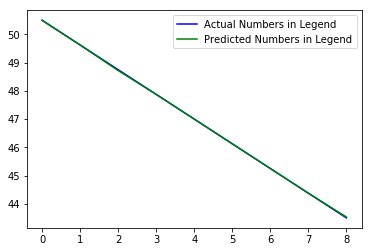

rmse of slice index 113 : 0.01473139127471974


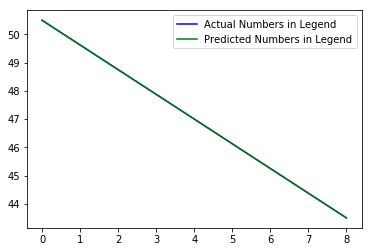

rmse of slice index 114 : 0.0007973599423122325


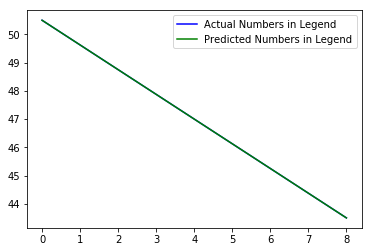

rmse of slice index 115 : 0.0004603559773349919


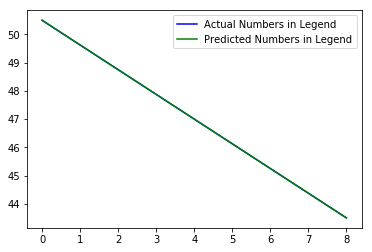

rmse of slice index 116 : 0.0004306235857852524


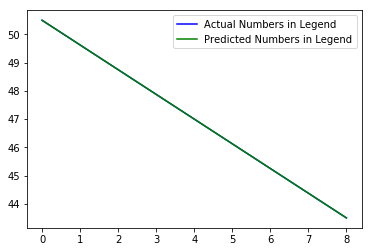

rmse of slice index 117 : 0.0006250932412002448


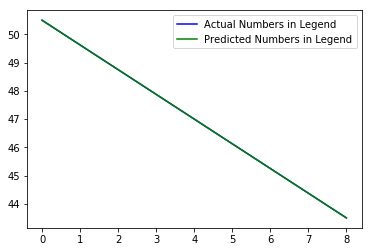

rmse of slice index 118 : 0.00011508899433374797


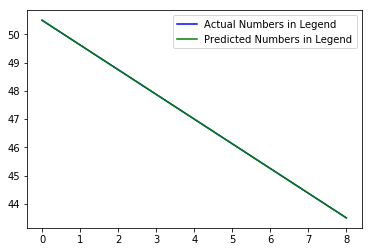

rmse of slice index 119 : 8.388479869827597e-05


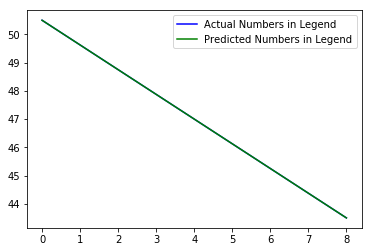

rmse of slice index 120 : 0.00019514288424937824


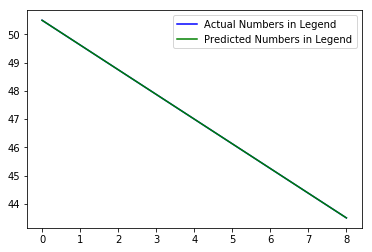

rmse of slice index 121 : 0.00019514288424937824


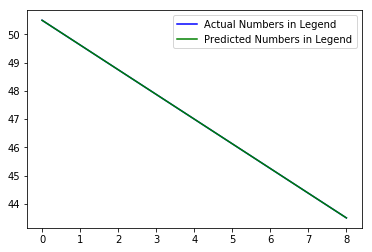

rmse of slice index 122 : 0.0002573468147923486


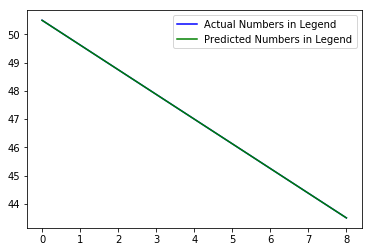

rmse of slice index 123 : 0.0007634140234087614


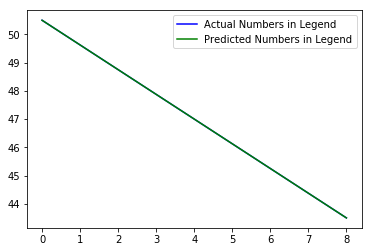

rmse of slice index 124 : 0.0002573468147923486


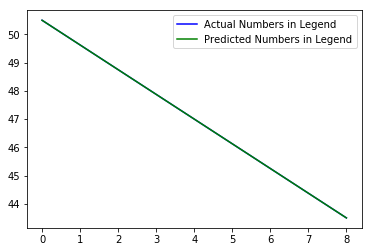

rmse of slice index 125 : 0.00019514288424937824


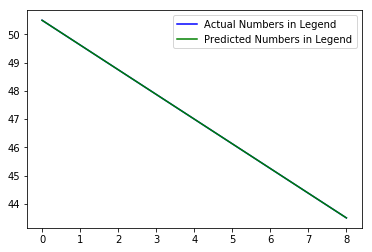

rmse of slice index 126 : 0.0001220703125


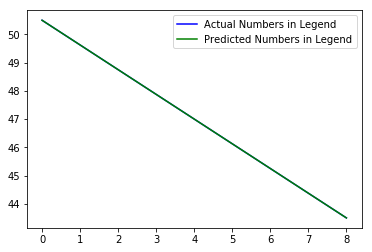

rmse of slice index 127 : 8.926355374544395e-05


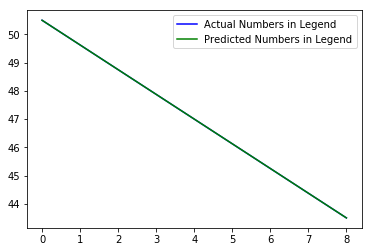

rmse of slice index 128 : 0.0004248171593794983


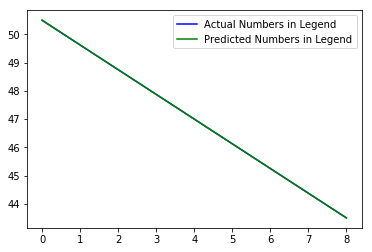

rmse of slice index 129 : 5.571721979829571e-05


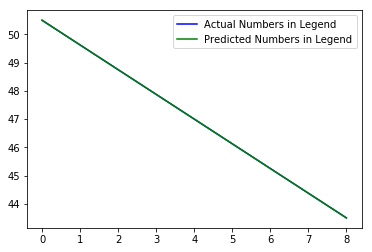

rmse of slice index 130 : 0.0005210875844265014


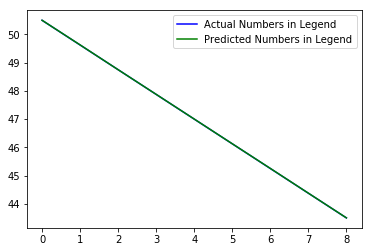

rmse of slice index 131 : 0.0024359748611809512


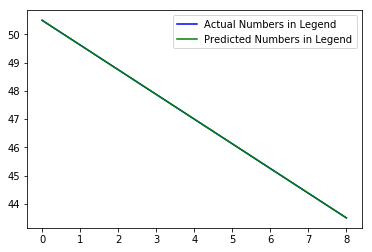

rmse of slice index 132 : 0.0005868410279075503


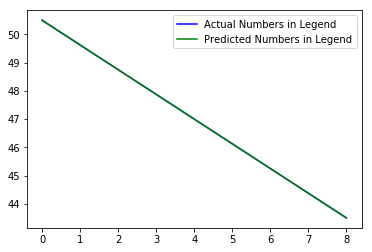

rmse of slice index 133 : 8.388479869827597e-05


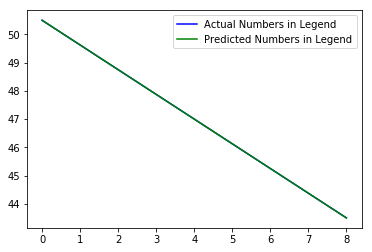

rmse of slice index 134 : 0.0001819716778564282


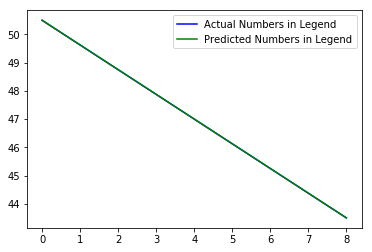

rmse of slice index 135 : 4.549291946410705e-05


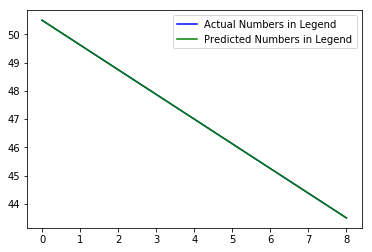

rmse of slice index 136 : 1.686922602516378e-05


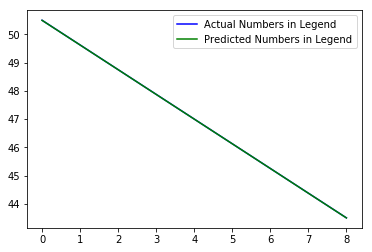

rmse of slice index 137 : 0.0018414239093399675


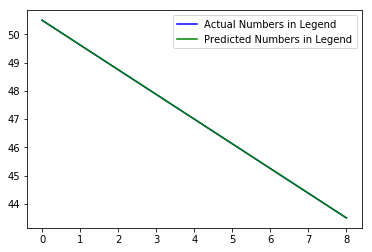

rmse of slice index 138 : 0.00015224842882380945


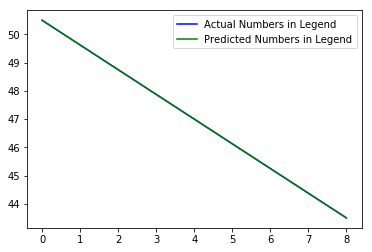

rmse of slice index 139 : 0.0002114319833458102


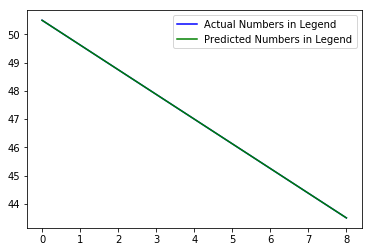

rmse of slice index 140 : 6.352740476886391e-05


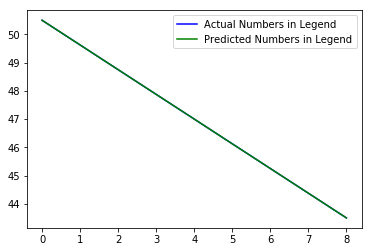

rmse of slice index 141 : 0.0007278867114257128


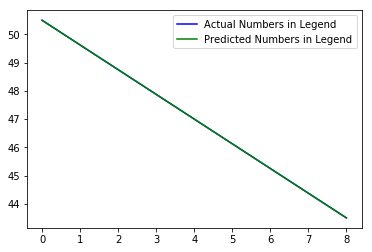

rmse of slice index 142 : 0.0003547281041292866


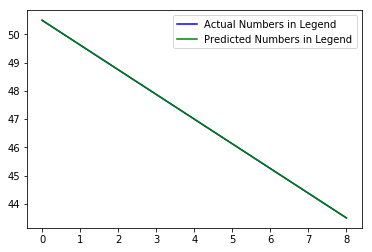

rmse of slice index 143 : 0.0003547281041292866


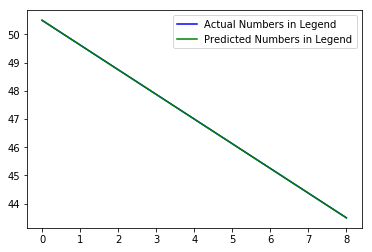

rmse of slice index 144 : 0.003238891396831445


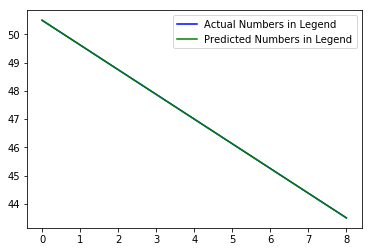

rmse of slice index 145 : 0.0008914755167727313


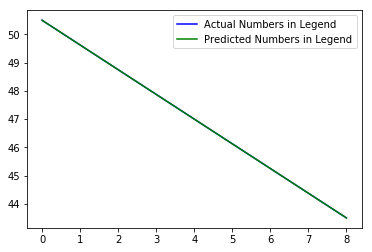

rmse of slice index 146 : 0.00028772248583436993


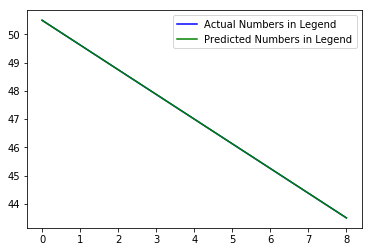

rmse of slice index 147 : 0.0007458619295175521


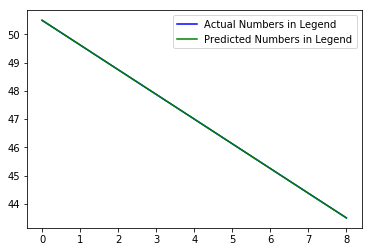

rmse of slice index 148 : 0.0018414239093399675


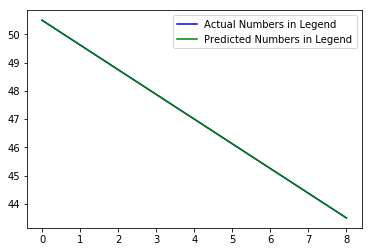

rmse of slice index 149 : 9.966999278902906e-05


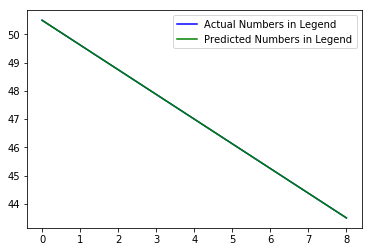

rmse of slice index 150 : 0.0001467102569768876


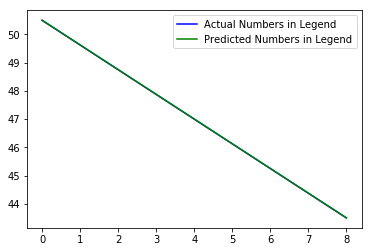

rmse of slice index 151 : 0.0002508306479072663


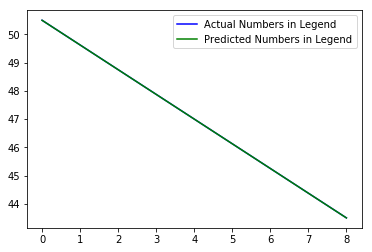

rmse of slice index 152 : 0.0009629036105305365


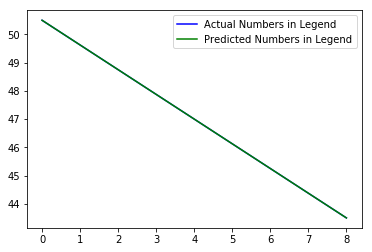

rmse of slice index 153 : 0.0003639433557128564


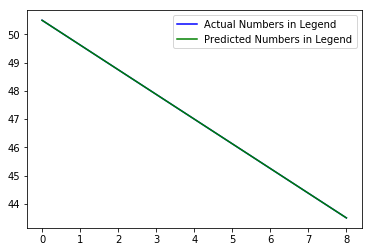

rmse of slice index 154 : 9.966999278902906e-05


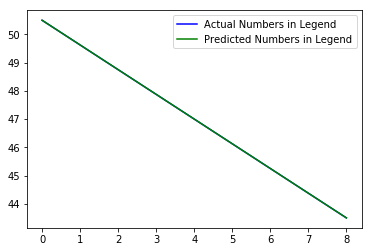

rmse of slice index 155 : 0.00023017798866749594


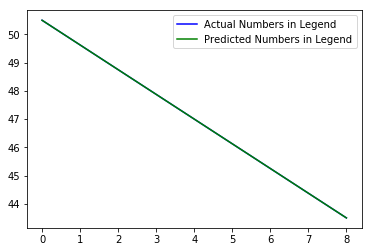

rmse of slice index 156 : 6.103515625e-05


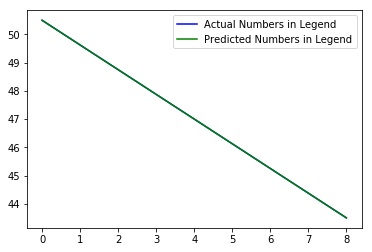

rmse of slice index 157 : 0.0010421751688530028


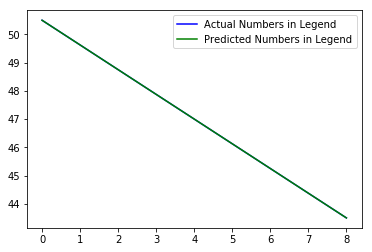

rmse of slice index 158 : 0.00023017798866749594


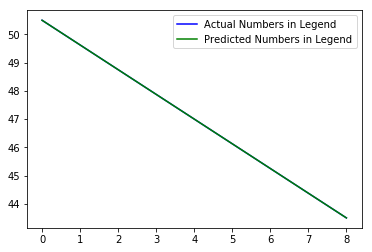

rmse of slice index 159 : 0.0001076558964463131


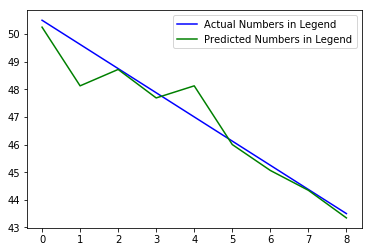

rmse of slice index 160 : 0.6403497037209868


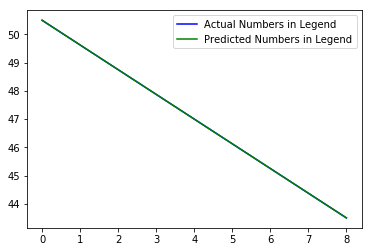

rmse of slice index 161 : 0.00017263349150062197


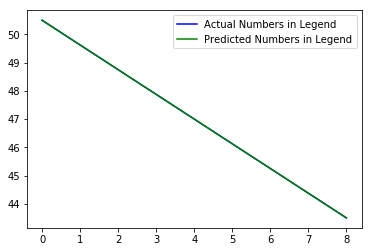

rmse of slice index 162 : 4.983499639451453e-05


In [102]:
lr_rmse__ = {}

for i in range(0,X_train.shape[0]):
    
    poly_features = PolynomialFeatures(degree = 3)  
    X_poly = poly_features.fit_transform(X_train[i,:,:])
    poly_model = LinearRegression()  
    poly_model.fit(X_poly, y_train)

    y_test = poly_model.predict(X_poly)
    
    if i < 10:
    
        plt.plot(y_train, "b", label='Actual Numbers in Legend')
    
        plt.plot(y_test, "g", label="Predicted Numbers in Legend")
    
        plt.legend()
    
        plt.show()
        
    print("rmse of slice index", i, ":", sqrt(mean_squared_error(y_train, y_test)))
    
    lr_rmse__[i] = sqrt(mean_squared_error(y_train, y_test))

In [104]:
#print(lr_rmse__)
print("---")
print("best result is with the slice index of:")
print(min(lr_rmse__, key=lr_rmse__.get))
key_min = min(lr_rmse__.keys(), key=(lambda k: lr_rmse__[k]))
print(lr_rmse__[key_min])

---
best result is with the slice index of:
136
1.686922602516378e-05


In [ ]:
legend_slice = legend_img[:,(min(lr_rmse, key=lr_rmse.get)),:]
legend_slice.shape

In [ ]:
X_train = legend_img
y_train = legend_results

X_test = test_img
y_test = np.empty(test_img.shape)

In [ ]:
X_test.shape

## Writing Linearally Regressed Prediction to a File

In [ ]:
f= open(r"C:\Users\Yiğit\Desktop\colormap_values.csv", "x") # x must be change to w+ in first execution

for i in range(0,X_test.shape[1]):
    
    model = LinearRegression()

    model.fit(legend_img[:,5,:], y_train)

    y_predict = np.array_str(model.predict(X_test[:,i,:]))
        
    f.write(y_predict)         

f.close()  

f=open(r"C:\Users\Yiğit\Desktop\colormap_values.csv", "r")

if f.mode == 'r':

    y_test_ = f.read()
    
f.close()

## Writing Polynomial Regressed Prediction to a File

In [105]:
X_train = legend_img
y_train = np.linspace(50.5, 43.5, num=X_train.shape[1])

X_test = test_img
#y_test #user will manually asses the result with by comparing visuals

In [116]:
f= open(r"C:\Users\Yiğit\Desktop\colormap_values_polynomial_regression.csv", "x") # x must be change to w+ in first execution

for i in range(0,X_train.shape[0]):
    
    poly_features = PolynomialFeatures(degree = 3)  
    X_poly = poly_features.fit_transform(X_train[i,:,:])
    poly_model = LinearRegression()  
    poly_model.fit(X_poly, y_train)

    X_test_poly = poly_features.fit_transform(X_train[i,:,:])
    y_predict =  np.array_str(poly_model.predict(X_test_poly))    
    f.write(y_predict)     
            

f.close()  

f=open(r"C:\Users\Yiğit\Desktop\colormap_values_polynomial_regression.csv", "r")

if f.mode == 'r':

    y_test_ = f.read()
    
f.close()

Now data must be adjusted manually by entering to the file (notepad++ is recommended):

1) Delete "[" and "]" characters

2) Delete double spaces (might be okay not to do so)

In [117]:
f=open(r"C:\Users\Yiğit\Desktop\colormap_values.csv")
array = []
for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])
        
f.close()

In [118]:
y=np.array([np.array(xi) for xi in array])
y.shape

(4463,)

In [119]:
y

array([array([46.430244, 46.15361 , 45.986862, 46.040073, 46.230644, 46.487743,
       46.397675]),
       array([45.973923, 45.958824, 46.198513, 46.162846, 46.019444, 46.318493,
       46.262783]),
       array([46.219597, 46.253002, 46.304142, 46.276585, 45.989887, 46.334213,
       46.173622]),
       ...,
       array([45.357166, 45.357166, 45.357166, 45.357166, 45.357166, 45.306484,
       45.456112]),
       array([45.628113, 45.58893 , 45.354706, 45.240704, 45.297077, 45.377872,
       45.507458]),
       array([44.945736, 45.642136])], dtype=object)

In [120]:
y.flatten("f")

array([array([46.430244, 46.15361 , 45.986862, 46.040073, 46.230644, 46.487743,
       46.397675]),
       array([45.973923, 45.958824, 46.198513, 46.162846, 46.019444, 46.318493,
       46.262783]),
       array([46.219597, 46.253002, 46.304142, 46.276585, 45.989887, 46.334213,
       46.173622]),
       ...,
       array([45.357166, 45.357166, 45.357166, 45.357166, 45.357166, 45.306484,
       45.456112]),
       array([45.628113, 45.58893 , 45.354706, 45.240704, 45.297077, 45.377872,
       45.507458]),
       array([44.945736, 45.642136])], dtype=object)

In [121]:
df = pd.DataFrame(y)
df.head()

0
0  [46.430244, 46.15361, 45.986862, 46.040073, 46...
1  [45.973923, 45.958824, 46.198513, 46.162846, 4...
2  [46.219597, 46.253002, 46.304142, 46.276585, 4...
3  [46.507442, 46.41307, 46.355865, 46.65261, 46....
4  [47.039104, 47.030823, 46.920166, 47.18449, 47...

In [122]:
df = df.transpose()
df.head()

0     \
0  [46.430244, 46.15361, 45.986862, 46.040073, 46...   

                                                1     \
0  [45.973923, 45.958824, 46.198513, 46.162846, 4...   

                                                2     \
0  [46.219597, 46.253002, 46.304142, 46.276585, 4...   

                                                3     \
0  [46.507442, 46.41307, 46.355865, 46.65261, 46....   

                                                4     \
0  [47.039104, 47.030823, 46.920166, 47.18449, 47...   

                                                5     \
0  [47.807667, 47.786938, 47.82337, 47.806515, 47...   

                                                6     \
0  [47.979946, 47.986626, 48.00667, 48.00667, 48....   

                                                7     \
0  [48.033195, 48.005108, 47.939857, 47.929485, 4...   

                                                8     \
0  [47.957268, 47.909206, 47.834484, 47.785652, 4...   

                                                9              ...            \
0  [47.688454, 47.845398, 47.825592, 47.659706, 4...           ...             

                                                4453  \
0  [45.40695, 45.40027, 45.38249, 45.37581, 45.34...   

                                                4454  \
0  [45.34038, 45.386314, 45.415195, 45.39515, 45....   

                                                4455  \
0  [45.247784, 45.3337, 45.40027, 45.338818, 45.2...   

                                                4456  \
0  [45.61192, 45.429787, 45.418686, 45.418686, 45...   

                                                4457  \
0  [45.368332, 45.334267, 45.379433, 45.334267, 4...   

                                                4458  \
0  [45.43554, 45.492577, 45.528137, 45.30442, 45....   

                                                4459  \
0  [45.3222, 45.3222, 45.3222, 45.3222, 45.339386...   

                                                4460  \
0  [45.357166, 45.357166, 45.357166, 45.357166, 4...   

                                                4461                    4462  
0  [45.628113, 45.58893, 45.354706, 45.240704, 45...  [44.945736, 45.642136]  

[1 rows x 4463 columns]

## Arranging the DataFrame to 2D Flat Version

In [123]:
lst = []
for n in df.values:
    for s in n:
        lst.append(s)

In [124]:
data = pd.DataFrame(lst)
data

0          1          2          3          4          5  \
0     46.430244  46.153610  45.986862  46.040073  46.230644  46.487743   
1     45.973923  45.958824  46.198513  46.162846  46.019444  46.318493   
2     46.219597  46.253002  46.304142  46.276585  45.989887  46.334213   
3     46.507442  46.413070  46.355865  46.652610  46.531410  46.938683   
4     47.039104  47.030823  46.920166  47.184490  47.441740  47.725400   
5     47.807667  47.786938  47.823370  47.806515  47.912777  48.018604   
6     47.979946  47.986626  48.006670  48.006670  48.001350  47.974625   
7     48.033195  48.005108  47.939857  47.929485  47.974056  47.976982   
8     47.957268  47.909206  47.834484  47.785652  47.727350  47.705240   
9     47.688454  47.845398  47.825592  47.659706  47.420254  47.423620   
10    47.636913  47.526985  47.432064  47.369076  47.300835  47.249847   
11    47.254707  47.250484  47.257168  47.118137  47.110027  47.079082   
12    47.015766  46.983395  46.952450  46.944340  47.063763  47.047610   
13    46.961395  46.953285  46.961395  46.992336  47.008556  46.997658   
14    46.997658  46.997658  46.997658  46.997658  46.997658  46.997658   
15    47.007260  46.973854  46.953810  46.960490  47.000580  47.047348   
16    46.997658  46.997658  46.997658  46.997658  46.997658  46.997658   
17    46.997658  46.972492  46.972492  46.954712  46.930252  46.896183   
18    46.873215  46.839150  47.207603  47.059254  46.942818  46.933277   
19    46.907585  46.856598  46.863280  46.863280  46.863280  46.845500   
20    46.788467  46.747720  46.747720  46.729935  46.727673  46.703213   
21    46.705540  46.683475  46.659010  46.570133  46.530050  46.487778   
22    46.478107  46.469864  46.445335  46.437096  46.411137  46.404457   
23    46.229427  46.128487  45.010890  44.539513  44.254967  44.397120   
24    44.334690  44.493103  44.504204  44.447655  45.122196  44.523792   
25    44.619312  45.149105  44.891144  44.770813  45.182613  44.925430   
26    45.491318  45.257233  45.474552  45.893314  46.814907  46.351320   
27    46.645016  46.799965  47.145740  46.734490  47.885803  48.400467   
28    49.447453  49.737440  49.900180  50.017210  50.038616  49.700768   
29    49.670220  49.684944  49.698307  49.714523  49.687800  49.628635   
...         ...        ...        ...        ...        ...        ...   
4433  44.420475  44.065178  44.047398  44.047398  44.014824  44.014824   
4434  43.962980  43.962980  44.098186  44.087086  44.061127  44.066250   
4435  44.163963  44.220997  44.287570  44.021080  44.021080  44.021080   
4436  44.021080  44.021080  44.021080  44.021080  44.024006  44.024006   
4437  44.024006  44.024006  44.024006  44.024006  44.024006  44.106663   
4438  44.513390  44.402378  44.112816  44.009914  44.070710  44.156690   
4439  44.107006  44.682766  45.665607  45.527542  45.382730  45.290070   
4440  45.182247  45.191452  45.198135  45.198135  45.232200  45.256660   
4441  45.297410  45.297410  45.778050  45.390335  45.169716  45.163273   
4442  45.248444  45.262707  45.187893  45.257324  45.257324  45.257324   
4443  45.264004  45.270683  45.270683  45.270683  45.578636  45.451100   
4444  45.346070  45.326620  45.468708  45.640682  45.643300  45.351190   
4445  45.320880  45.334240  45.350530  45.389010  45.443783  45.487453   
4446  45.464490  45.397915  45.346070  45.313564  45.323235  45.341015   
4447  45.445080  45.709190  45.637016  45.525940  45.415737  45.271255   
4448  45.418686  45.348927  45.386750  45.457146  45.477850  45.451126   
4449  45.366707  45.368970  45.421124  45.348290  45.469870  45.494335   
4450  45.436466  45.334927  45.320904  45.398050  45.398050  45.398050   
4451  45.398050  45.398050  45.398050  45.398050  45.177788  45.347060   
4452  45.366070  45.271717  45.219830  45.417217  45.760624  45.424732   
4453  45.406950  45.400270  45.382490  45.375810  45.341743  45.341743   
4454  45.340380  45.386314  45.415195  45.395150  45.359590  45.353740   
4455  45.247784  4

In [126]:
d = data.transpose()

In [140]:
d

0          1          2          3          4          5     \
0  46.430244  45.973923  46.219597  46.507442  47.039104  47.807667   
1  46.153610  45.958824  46.253002  46.413070  47.030823  47.786938   
2  45.986862  46.198513  46.304142  46.355865  46.920166  47.823370   
3  46.040073  46.162846  46.276585  46.652610  47.184490  47.806515   
4  46.230644  46.019444  45.989887  46.531410  47.441740  47.912777   
5  46.487743  46.318493  46.334213  46.938683  47.725400  48.018604   
6  46.397675  46.262783  46.173622  46.950268  47.584293  47.999990   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   

        6          7          8          9       ...           4453  \
0  47.979946  48.033195  47.957268  47.688454    ...      45.406950   
1  47.986626  48.005108  47.909206  47.845398    ...      45.400270   
2  48.006670  47.939857  47.834484  47.825592    ...      45.382490   
3  48.006670  47.929485  47.785652  47.659706    ...      45.375810   
4  48.001350  47.974056  47.727350  47.420254    ...      45.341743   
5  47.974625  47.976982  47.705240  47.423620    ...      45.341743   
6  47.960537  47.908806  47.670605  47.630867    ...      45.261806   
7        NaN        NaN        NaN        NaN    ...            NaN   
8        NaN        NaN        NaN        NaN    ...            NaN   

        4454       4455       4456       4457       4458       4459  \
0  45.340380  45.247784  45.611920  45.368332  45.435540  45.322200   
1  45.386314  45.333700  45.429787  45.334267  45.492577  45.322200   
2  45.415195  45.400270  45.418686  45.379433  45.528137  45.322200   
3  45.395150  45.338818  45.418686  45.334267  45.304420  45.322200   
4  45.359590  45.251343  45.386116  45.332706  45.322200  45.339386   
5  45.353740  45.259453  45.386116  45.321606  45.322200  45.357166   
6  45.328620  45.418686  45.368332  45.362290  45.322200  45.357166   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   

        4460       4461       4462  
0  45.357166  45.628113  44.945736  
1  45.357166  45.588930  45.642136  
2  45.357166  45.354706        NaN  
3  45.357166  45.240704        NaN  
4  45.357166  45.297077        NaN  
5  45.306484  45.377872        NaN  
6  45.456112  45.507458        NaN  
7        NaN        NaN        NaN  
8        NaN        NaN        NaN  

[9 rows x 4463 columns]

In [141]:
arr = d.values.copy()
arr.resize(4463*9,1)
t = pd.DataFrame(arr.T)
t

0          1          2          3          4          5      \
0  46.430244  45.973923  46.219597  46.507442  47.039104  47.807667   

       6          7          8          9      ...    40157  40158  40159  \
0  47.979946  48.033195  47.957268  47.688454  ...      NaN    NaN    NaN   

   40160  40161  40162  40163  40164  40165  40166  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[1 rows x 40167 columns]

In [142]:
t.dropna(axis=1, inplace=True)
t

0          1          2          3          4          5      \
0  46.430244  45.973923  46.219597  46.507442  47.039104  47.807667   

       6          7          8          9        ...          39936  \
0  47.979946  48.033195  47.957268  47.688454    ...      43.928593   

       39959     39982      40005      40028      40051     40074     40097  \
0  44.055733  43.98622  43.966988  44.351124  44.112225  44.07383  43.94567   

       40120      40143  
0  44.154808  45.234398  

[1 rows x 31622 columns]

In [143]:
arr = t.values.copy()
arr.resize(163,194)
t = pd.DataFrame(arr)
t

0          1          2          3          4          5    \
0    46.430244  45.973923  46.219597  46.507442  47.039104  47.807667   
1    47.764360  47.463380  46.823830  46.808407  46.916560  47.049680   
2    45.267963  45.112617  44.916790  44.647606  44.658730  44.632940   
3    46.325386  46.824337  46.974625  46.881000  46.824825  46.807045   
4    45.333310  45.096466  45.014942  44.667995  44.671963  44.675010   
5    44.679806  45.078133  44.581806  44.610340  45.030260  45.211900   
6    45.255040  45.110462  44.908485  44.711030  44.547260  44.563890   
7    44.136738  44.047398  44.053270  44.479095  44.893406  44.966045   
8    45.318363  44.703120  44.799470  44.701400  44.562912  44.458466   
9    44.573030  43.950570  44.421497  44.494250  44.432640  44.507230   
10   44.526733  44.212776  44.517670  44.231130  44.621784  44.497517   
11   44.051178  44.372093  44.446335  44.881718  45.145096  44.159428   
12   44.228405  44.662250  44.169350  44.104004  43.992874  44.013580   
13   44.413550  44.657387  45.020700  44.208520  44.852070  44.071316   
14   44.018993  44.051563  44.236690  44.038320  44.305138  44.612920   
15   44.945770  45.389720  44.537655  44.427296  44.306670  44.196968   
16   43.971090  43.946533  43.989410  44.090115  43.974620  44.173000   
17   44.568317  44.155560  44.229633  44.498077  44.359610  44.295372   
18   44.074463  44.139317  43.989727  43.961483  43.952515  44.536785   
19   43.993286  44.080788  44.033424  44.058113  44.003340  44.040714   
20   44.026400  44.092136  43.995865  43.988390  43.983047  44.081330   
21   43.958267  44.063060  44.132317  44.220562  44.007350  44.025726   
22   44.105380  43.995007  44.169666  44.047554  44.381250  43.989727   
23   44.945736  46.153610  45.958824  46.253002  46.413070  47.030823   
24   48.174236  47.740227  47.440853  46.783546  46.824825  46.916560   
25   45.537712  45.344320  45.047410  44.912903  44.905697  44.415500   
26   45.996880  46.327282  46.824337  47.025920  46.866210  46.808540   
27   45.617115  45.382732  45.055717  45.111270  44.662014  44.565940   
28   44.009320  44.303112  44.779892  44.771427  44.710846  45.212543   
29   45.505520  45.200863  45.183956  44.882595  44.639114  44.536163   
..         ...        ...        ...        ...        ...        ...   
133  44.030884  44.004837  44.001686  43.977930  43.972580  43.956997   
134  44.029617  43.958492  44.135532  44.069664  44.024680  44.335037   
135  44.039062  44.028595  45.085210  44.005470  43.988390  43.977930   
136  44.442425  43.972992  44.716293  44.088620  44.219067  43.954006   
137  43.979424  44.019970  43.995007  43.995007  43.982410  44.116850   
138  45.306484  45.377872  46.397675  46.262783  46.173622  46.950268   
139  48.273680  47.780247  47.459885  46.888640  46.816452  46.916560   
140  45.627450  46.024372  45.137215  45.087162  44.842876  44.420920   
141  46.140343  46.317540  46.676426  46.947240  46.910583  46.847725   
142  45.636593  45.766003  45.127674  44.917053  44.690260  44.866005   
143  44.084705  44.657974  45.309513  44.582176  44.549614  44.851055   
144  45.341020  45.272820  45.055520  44.981735  44.711030  44.542140   
145  44.406174  44.172523  44.000034  44.215400  44.257072  44.575890   
146  44.919044  45.245243  44.705980  44.819183  44.699665  44.556230   
147  44.262577  43.989662  44.231503  44.878994  44.395676  44.531452   
148  44.267483  44.248474  44.143390  44.217900  44.130820  44.572520   
149  44.611298  44.054170  44.157547  44.353714  44.730793  44.979843   
150  44.175950  44.230007  44.211945  44.084890  44.018290  44.069077   
151  44.628970  44.459420  44.371086  44.862350  44.197380  44.587063   
152  44.023144  43.961258  44.149280  44.580030  44.057700  44.068855   
153  44.568750  44.838210  44.705383  44.542140  44.465714  44.331024   
154  44.281376  43.982185  44.088646  43.936070  44.072334  44.001938   
155  44.012310  44.149990  44.348370  44.291520  44.262997  44.331290

We have reached our objective of finding ML deduced values from pixel values.

In [146]:
final_image = smp.toimage(t)       # Create a PIL image
final_image.show()   

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


### How map of values looks in heatmap:

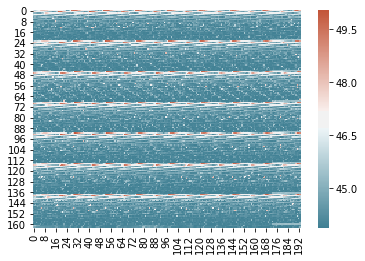

In [145]:
import seaborn as sns

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(t, cmap=cmap)

### How manually arranged legend values look in heatmap:

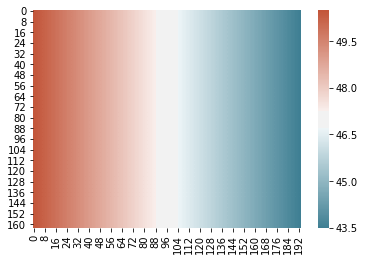

In [166]:
legend_illustration = np.linspace(50.5, 43.5, num=194)
legend_illustration = np.array(163*[legend_illustration])
ax = sns.heatmap(legend_illustration, cmap=cmap)

# Conclusion

As a result, we have managed to find values of colormap by using regression, polynomial regression produced best results.

In addition, there can be better methods to find the values of colormaps, some options are:

    - NN can be done, but format of matrixes must be arranged or custom made nodes must be used since this is not a common image processing problem; insted of making NN learn by looking at different images, the problem is finding values by considering the same picture,
    
    - Legend can be resized as the same dimensions of map, this way there will be more possibilities in using ML,
    
    - Mathematically deducing the relation between RGB values with corresponding values with or without using NN is also one of the options I could think of.
    
Thanks for paying attention.